<div class="alert alert-block alert-danger">
<b>Wichtig:</b><br>
Bitte führen Sie zu Beginn einmalig die Funktion <b><i>Cell > Run All</i></b> aus, damit die verwendeten Buttons im Verlauf des Dokuments korrekt angezeigt werden. Des weiteren möchten wir Sie bitten, über die Funktion <b><i>Cell > All Output > Toggle Scrolling </i></b> zu deaktivieren, damit die Abbildungen gänzlich angezeigt werden und es keinem Scrolling bedarf.

In [1]:
import ipywidgets as widgets
from IPython.display import Markdown
from IPython.display import Code

output = {}
value = {}

def toggle_button_observer(change):
    id = change['owner'].model_id
    # description = change['owner'].description
    
    with output[id]:
        if change["new"]:
            output[id].clear_output()
            display(value[id])
        else:
            output[id].clear_output()

# Projekt Katalonia 

## Gruppe C

eingereicht von Gabriel Sacher, Karina Hasler und Alicia Hamann


<div class="alert alert-block alert-info">
<b>Hinweis:</b><br> 
Für eine bessere Lesbarkeit sind im folgenden Dokument die Code Inputs ausgeblendet. Um den Code sichtbar zu machen, klicken Sie bitte auf den Button <b>Code Anzeigen</b>. Im weiteren Verlauf finden Sie außerdem unter dem Button <b>Interpretation</b> eine Interpretation des jeweiligen vorangegangenen Outputs. 
</div>

In [2]:
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Code Anzeigen", True: "Code Verbergen"}


def toggle_code(state):

    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """

    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)

    display(HTML(output))


def button_action(value):

    """
    Calls the toggle_code function and updates the button description.
    """

    state = value.new

    toggle_code(state)

    value.owner.description = button_descriptions[state]


state = False
toggle_code(state)

button = widgets.ToggleButton(state, description = button_descriptions[state], button_style='primary')
button.observe(button_action, "value")

display(button)

ToggleButton(value=False, button_style='primary', description='Code Anzeigen')

# Aufgabe 1: Import und Analyse der Trainingsdaten

### a) Importieren Sie die Trainingsdaten in passende Python-Datenstrukturen. 

**Imports:** 

- Import der Libraries <code>numpy</code>, <code>pandas</code>, <code>math</code>, <code>matplotlib.pyplot</code> sowie <code>seaborn</code>. 

- Import des Datensatzes <code>Trainingsdaten.csv</code>

In [3]:
### Libraries Import

import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
### Daten Import
df = pd.read_csv("Trainingsdaten.csv", index_col="ID")

#### Überblick über Datenstrukturen & Datentypen

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1700 entries, 251 to 1440
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Land               1700 non-null   object
 1   Quelle             1700 non-null   object
 2   Transaktionen      1700 non-null   int64 
 3   letzte Aenderung   1700 non-null   int64 
 4   erste Aenderung    1700 non-null   int64 
 5   Online-Bestellung  1700 non-null   bool  
 6   Geschlecht         1700 non-null   object
 7   Adresstyp          1700 non-null   object
 8   Kauf               1700 non-null   object
 9   Umsatz             1700 non-null   int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 134.5+ KB


**Abbildung der ersten 5 Zeilen des Datensatzes:** <code>Trainingsdaten.csv</code>

In [6]:
df.head(5)

Land Quelle  Transaktionen  letzte Aenderung  erste Aenderung  \
ID                                                                      
251   Inland      A              0              3507             3507   
83    Inland      O              0              3745             3745   
1002  Inland      T              1              3242             3242   
108   Inland      U              1              2907             2907   
206   Inland      S              0               181              181   

      Online-Bestellung Geschlecht      Adresstyp  Kauf  Umsatz  
ID                                                               
251               False          w  Firmenadresse  nein       0  
83                 True          w  Firmenadresse  nein       0  
1002              False          w  Firmenadresse  nein       0  
108               False          m  Firmenadresse    ja     160  
206               False          w  Firmenadresse  nein       0

#### Ergänzung zusätzlicher Spalte - Eingabeparameter Optimierung

Die Spalte **Änderung Differenz** wurde hinzugefügt, da es aus ökonomischer Sicht sinnvoll erschien, zu berücksichtigen, wenn erste und letzte Änderung auf den gleichen Tag fallen oder die Differenz sehr groß ist. Tatsächlich zeigte diese Variable in der späteren Analyse auch den zweitgrößten Informationsgewinn. Da unser bestes Modell, Gradient Boosting, ohne die zusätzliche Spalte aber am besten performte, wird sie im finalen Modell nicht berücksichtigt.

In [7]:
#df['Änderung Differenz'] = df['letzte Aenderung'] - df['erste Aenderung']

**Attribut Zuordnung:** Kategorisierung der Attribute des Datensatzes <code>Trainingsdaten.csv</code> in binäre, kategorische und numerische Attribute. Definition der predictor_attributes sowie der Zielvariable (Kauf).

In [8]:
### Attribute zuordnen 
binary_attributes = ['Land', 'Online-Bestellung', 'Geschlecht', 'Adresstyp']
categorical_attributes = ['Quelle']
numerical_attributes = ['Transaktionen', 'letzte Aenderung', 'erste Aenderung', 'Umsatz']
predictor_attributes = binary_attributes + categorical_attributes + numerical_attributes
target_variable = 'Kauf'

### b) Verschaffen Sie sich einen Überblick über die Daten im Hinblick auf die Modellbildung mithilfe von passenden graphischen Darstellungen. Welche Attribute haben wahrscheinlich den höchsten Informationsgrad bezogen auf die Aufgabenstellungen?

#### Visualisierung kategorischer Attribute

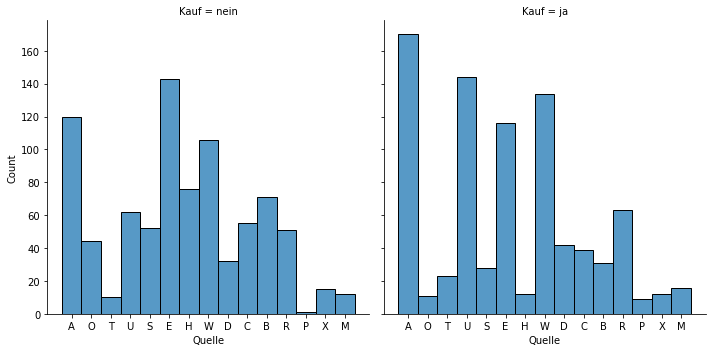

In [9]:
### Plot categorical Attribute
for cat in categorical_attributes:
    sns.displot(df, x=cat, col=target_variable)

In [10]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Diese Darstellung zeigt, dass aus den verschiedenen Quelldatenkatalogen jeweils unterschiedlich viele Kunden im Trainingsdatensatz enthalten sind (beispielweise scheinen ca. 290 Kunden der Quelle A und nur ca. 15 Kunden der Quelle P zuzuordnen zu sein). Somit ist eine Interpretation der absoluten Werte in dieser Darstellung im Hinblick auf die Kaufwahrscheinlichkeit nicht besonders aufschlussreich, während eine Analyse der relativen Häufigkeiten jedoch interessante Erkenntnisse liefert. So scheinen z.B. Kunden, die der Quelle U zuzuordnen sind, wahrscheinlicher zur Gruppe der Käufer zu gehören als Kunden, die der Quelle H zuzuordnen sind.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

#### Visualisierung numerischer Attribute - Box Plot

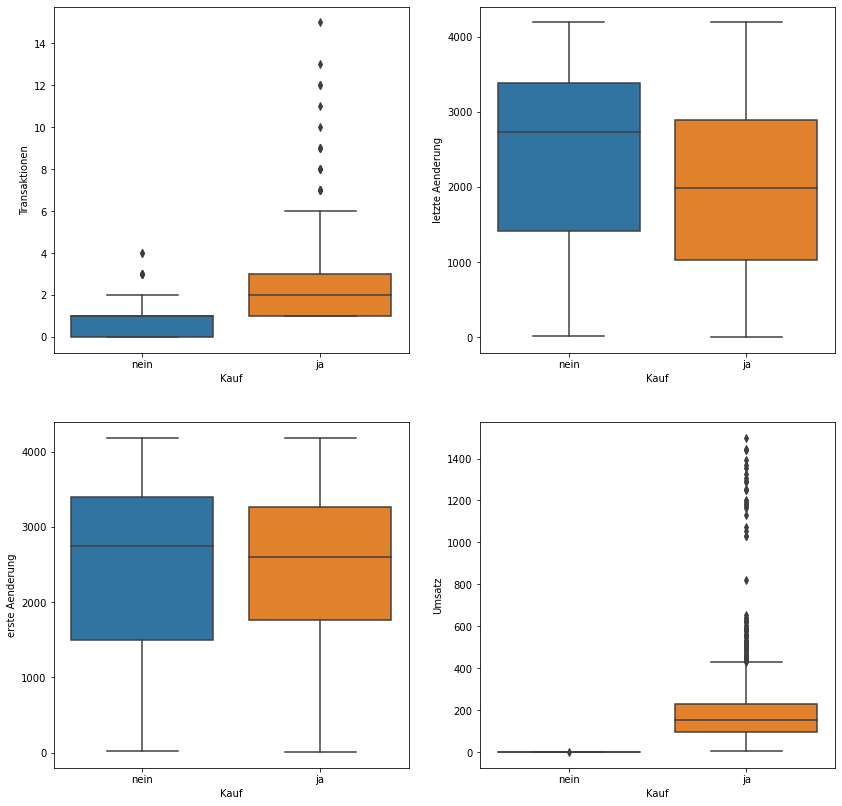

In [11]:
### Darstellung 2 Spalten x 2 Reihen
rows, cols = 2, 2
fig, axs = plt.subplots(ncols=cols, nrows=rows, figsize=(7*cols, 7*rows))
axs = axs.flatten()
posn = 0

### Plot numerische Attribute
for num in numerical_attributes:
    sns.boxplot(x=target_variable, y=num, data=df, ax=axs[posn])
    axs[posn].set_ylabel(num)
    axs[posn].set_title("")
    posn += 1

In [12]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
* Bei Kunden mit einer größeren Anzahl von Transaktionen im letzten Jahr ist ein Kauf wahrscheinlicher. 
* In der Gruppe der Käufer liegt die letzte Änderung tendenziell weniger weit zurück als in der Gruppe der Nicht-Käufer.
* Im Hinblick auf die Anzahl der Tage seit der ersten Änderung am Kundendatensatz gibt es keine gravierenden Unterschiede zwischen der Gruppe der Käufer und der der Nicht-Käufer.
* Ein Umsatz fiel nur bei Kunden an, die (mindestens) einen Kauf getätigt haben. Das mittlere Umsatzvolumen liegt ungefähr bei EUR 150, der größte Umsatz betrug über EUR 1.500.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

#### Visualisierung numerischer Attribute - Histogramm

**Imports:** Import der Library <code>plotly</code>. 

In [13]:
### Installation plotly

!pip install plotly==4.14.1

import plotly.express as px

In [14]:
### Plot numerical Attribute
for element in numerical_attributes:
    fig = px.histogram(df, x=element, color="Kauf", nbins=200, marginal="box")
    fig.show()    

In [15]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Die Darstellung als Histogramm bestätigt die Erkenntnisse aus der vorausgegangenen Visualisierung als Boxplot und liefert weitere Einblicke.
* Die meisten Kunden im Trainingsdatensatz haben eine Transaktion getätigt. Hiervon hat knapp die Hälfte auch gekauft.
* Die Anzahl der Tage seit der letzten Änderung am Kundendatensatz reicht von 0 bis ca. 4.250. Auf den ersten Blick scheint es hier keine signifikanten Unterschiede zwischen Käufern und Nicht-Käufern im Hinblick auf den zeitlichen  Horizont zu geben.
* Die erste Änderung scheint bei relativ vielen Kunden vor längerer Zeit erfolgt sein. Nichtsdestotrotz ist auch hier aus dieser Darstellung kein signifikanter Unterschied zwischen Käufern und Nicht-Käufern erkennbar.
* Der Umsatz betrug in den meisten Fällen zwischen EUR 0 und EUR 300, es wurden vereinzelt jedoch auch sehr hohe Umsätze (> EUR 1.000) generiert.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

#### Visualisierung binärer Attribute

In [16]:
### Anteil Käufe Ausland / Inland 
Anteil_Ausland = (((df['Land'] == 'Ausland') & (df['Kauf'] == 'ja')).sum() / (df['Land'] == 'Ausland').sum()*100).round(5)
Anteil_Inland = (((df['Land'] == 'Inland') & (df['Kauf'] == 'ja')).sum() / (df['Land'] == 'Inland').sum()*100).round(5)
df_bin_rel = pd.DataFrame({'Land': [Anteil_Ausland, Anteil_Inland]})

### Anteil Käufe Online-Bestellung / Keine Online-Bestellung 
Anteil_KeineOnlineBestellung = (((df['Online-Bestellung'] == False) & (df['Kauf'] == 'ja')).sum() / (df['Online-Bestellung'] == False).sum()*100).round(5)
Anteil_OnlineBestellung = (((df['Online-Bestellung'] == True) & (df['Kauf'] == 'ja')).sum() / (df['Online-Bestellung'] == True).sum()*100).round(5)
df_bin_rel['Online-Bestellung'] = pd.DataFrame({'Online-Bestellung': [Anteil_KeineOnlineBestellung, Anteil_OnlineBestellung]})

### Anteil Käufe Männlich / Weiblich
Anteil_Männlich = (((df['Geschlecht'] == 'm') & (df['Kauf'] == 'ja')).sum() / (df['Geschlecht'] == 'm').sum()*100).round(5)
Anteil_Weiblich = (((df['Geschlecht'] == 'w') & (df['Kauf'] == 'ja')).sum() / (df['Geschlecht'] == 'w').sum()*100).round(5)
df_bin_rel['Geschlecht'] = pd.DataFrame({'Geschlecht': [Anteil_Männlich, Anteil_Weiblich]})

### Anteil Käufe Firmenadresse / Privatadresse
Anteil_Privatadresse = (((df['Adresstyp'] == 'Privatadresse') & (df['Kauf'] == 'ja')).sum() / (df['Adresstyp'] == 'Privatadresse').sum()*100).round(5)
Anteil_Firmenadresse = (((df['Adresstyp'] == 'Firmenadresse') & (df['Kauf'] == 'ja')).sum() / (df['Adresstyp'] == 'Firmenadresse').sum()*100).round(5)
df_bin_rel['Adresstyp'] = pd.DataFrame({'Adresstyp': [Anteil_Privatadresse, Anteil_Firmenadresse]})

legend = {'Land':['Ausland', 'Inland'],
          'Online-Bestellung':['Nein', 'Ja'],
          'Geschlecht':['Männlich', 'Weiblich'],
          'Adresstyp':['Privatadresse', 'Firmenadresse']}

### Säulendiagramm für relative Kaufwahrscheinlichkeiten der binären Attribute

for col in df_bin_rel:
    fig = px.bar(df_bin_rel, x=legend[col], y=col)
    fig.update_layout(
    title=col,
    xaxis_title=" ",
    yaxis_title="Kaufwahrscheinlichkeit in %",
    width=500,
    height=500
)
    fig.show()

In [17]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
- Knapp über die Hälfte der Kunden aus dem Inland haben einen Kauf getätigt. Nichtsdestotrotz lässt die Unterscheidung zwischen Kunden aus dem In- und Ausland keine eindeutige Identifizierung von Käufern zu. 
- Ein Kauf ist beim Vorliegen einer Online-Bestellung wahrscheinlicher, als wenn keine Online-Bestelllung getätigt wurde. Von den Kunden mit einer Online-Bestellung tätigten ca. 64% einen Kauf.
- Zwischen Männern und Frauen scheint es keine offensichtlichen Unterschiede im Hinblick auf die Kaufwahrscheinlichkeit zu geben.
- Auch der Adresstyp gibt keinen eindeutigen Aufschluss darüber, ob ein Kauf wahrscheinlich getätigt wird oder nicht.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

#### Entropie und Information Gain

**Frage:** Wie gut teilt jedes Attribut die Stichprobe bezüglich der Zielvariable in Segmente auf?

Hierfür wird zunächst das Reinheitsmaß der Entropie, das die Unordnung innerhalb eines Segments misst, zugrunde gelegt. Zur Lösung des vorliegenden Problems wird dann der Informationsgewinn definiert, der die Reduktion der Entropie (also der Unordnung) durch ein bestimmtes Attribut misst. Die nötigen Formeln zur Umsetzung in Python werden im Folgenden definiert.

In [18]:
### Entropie und Information Gain Formeln

def entropy(target_column):
    """
        computes -sum_i p_i * log_2 (p_i) for each i
    """
    # get the counts of each target value
    target_counts = target_column.value_counts().astype(float).values
    total = target_column.count()  
    # compute probas
    probas = target_counts/total
    # p_i * log_2 (p_i)
    entropy_components = probas * np.log2(probas)
    # return negative sum
    return - entropy_components.sum()

def information_gain(df, info_column, target_column, threshold):
    """
        computes H(target) - H(target | info > thresh) - H(target | info <= thresh)
    """
    # split data
    data_above_thresh = df[df[info_column] > threshold]
    data_below_thresh = df[df[info_column] <= threshold]
    # get entropy
    H = entropy(df[target_column])
    entropy_above = entropy(data_above_thresh[target_column])
    entropy_below = entropy(data_below_thresh[target_column])
    # compute weighted average
    ct_above = data_above_thresh.shape[0]
    ct_below = data_below_thresh.shape[0]
    tot = float(df.shape[0])
    return H - entropy_above*ct_above/tot - entropy_below*ct_below/tot 

def best_threshold(df, info_column, target_column, criteria=information_gain):
    maximum_ig = 0
    maximum_threshold = 0
    l = []

    for thresh in df[info_column].unique():
        IG = criteria(df, info_column, target_column, thresh)
        if IG > maximum_ig:
            maximum_ig = IG
            maximum_threshold = thresh
        
        l.append([thresh, IG])
    return (maximum_threshold, maximum_ig, l)

def best_split(df, info_columns, target_column, criteria=information_gain):
    maximum_ig = 0
    maximum_threshold = 0
    maximum_column = ""
    l = []
    
    for info_column in info_columns:
        display(info_column)
        
        thresh, ig, x = best_threshold(df, info_column, target_column, criteria)      
        
        if ig > maximum_ig:
            maximum_ig = ig
            maximum_threshold = thresh
            maximum_column = info_column          
        
        l.append([info_column, ig])
    return maximum_column, maximum_threshold, maximum_ig, l

#### Bestimmung der Attribute mit dem größten Einfluss auf Kauf

**Frage:** Welches Attribut hat den größten Einfluss?

'Land'

'Quelle'

'Transaktionen'

'letzte Aenderung'

'erste Aenderung'

'Online-Bestellung'

'Geschlecht'

'Adresstyp'

'Umsatz'


Das Attribut mit dem größten Einfluss auf die Zielvariable Kauf ist Umsatz mit einem Informationsgewinn von 1.0000 bei einem Threshold von 1.00


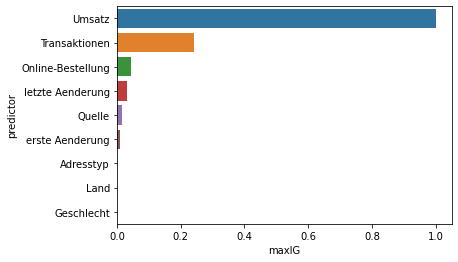

In [19]:
attributes = list(df.columns.values)
target_variable = 'Kauf'
attributes.remove('Kauf')

max_col, max_threshold, max_ig, list_ig = best_split(df, attributes, target_variable)

df_plot = pd.DataFrame(list_ig, columns=['predictor', 'maxIG'])
df_plot.sort_values(by='maxIG', ascending=False, inplace=True)
sns.barplot(y="predictor", x="maxIG", data=df_plot)
print ("\nDas Attribut mit dem größten Einfluss auf die Zielvariable Kauf ist \033[1m%s\033[0m mit einem Informationsgewinn von %.4f bei einem Threshold von %.2f" % (max_col, max_ig, max_threshold))

In [20]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Umsatz hat logischerweise den größten Information Gain, da Umsatz nur dann zustande kommt, wenn ein Kauf stattgefunden hat. Daher wird im Folgenden der Umsatz als erklärendes Attribut herausgenommen.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

'Land'

'Quelle'

'Transaktionen'

'letzte Aenderung'

'erste Aenderung'

'Online-Bestellung'

'Geschlecht'

'Adresstyp'


Das Attribut mit dem größten Einfluss auf die Zielvariable Kauf ist Transaktionen mit einem Informationsgewinn von 0.2415 bei einem Threshold von 0.00


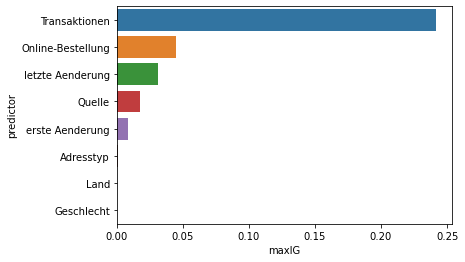

In [21]:
attributes = list(df.columns.values)
target_variable = 'Kauf'
attributes.remove('Kauf')
attributes.remove('Umsatz')

max_col, max_threshold, max_ig, list_ig = best_split(df, attributes, target_variable)

df_plot = pd.DataFrame(list_ig, columns=['predictor', 'maxIG'])
df_plot.sort_values(by='maxIG', ascending=False, inplace=True)
sns.barplot(y="predictor", x="maxIG", data=df_plot)
print ("\nDas Attribut mit dem größten Einfluss auf die Zielvariable Kauf ist \033[1m%s\033[0m mit einem Informationsgewinn von %.4f bei einem Threshold von %.2f" % (max_col, max_ig, max_threshold))

In [22]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Unter Zugrundelegung des Information Gain teilt das Attribut Transaktionen mit einem Threshold von 0 die Stichprobe am besten in Segmente auf. Die Attribute Online-Bestellung, Letzte Änderung, Quelle und Erste Änderung liefern jeweils einen deutlich geringeren Information Gain, während die Attribute Adresstyp, Land und Geschlecht keine Aussagekraft zu besitzen scheinen. Diese Erkenntnisse decken sich weitestgehend mit den Interpretationen aus den vorangegangenen Visualisierungen.'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

### c) Kodieren Sie die Trainingsdaten passend für die folgenden Modellbildungen.

**Umkodierung binärer Attribute:** 

- Bei den Attributen <b>Land</b>,  <b>Online-Bestellung</b>, <b>Geschlecht</b>,  <b>Adresstyp</b> sowie <b>Kauf</b> handelt es sich um Variablen mit je zwei möglichen Ausprägungen.
- Die Ausprägungen werden für die weitere Verarbeitung für jedes dieser Attribute jeweils in 0 und 1 umkodiert.
- Des weiteren werden die Attribute <b>Land</b> zu <b>Inland</b>, <b>Geschlecht</b> zu <b>Männlich</b> und <b>Adresstyp</b> zu <b>Firmenadresse</b> umbenannt, wobei der Wert 1 mit <i>True</i> und 0 mit <i>False</i> zu interpretieren ist. Inland = 0 würde so beispielsweise Ausland bedeuten.

In [23]:
### Binäre Ausprägungen in Zahlen umwandeln

# Land (1 = Inland, 0 = Ausland)
df['Land'].replace(to_replace="Inland", value=1, inplace=True)
df['Land'].replace(to_replace="Ausland", value=0, inplace=True)
df.rename(columns={'Land': 'Inland'}, inplace=True)

# Online-Bestellung (1 = ja, 0 = nein)
df['Online-Bestellung'] = df['Online-Bestellung'].astype(int)

# Geschlecht (0 = weiblich, 1 = männlich)
df['Geschlecht'].replace(to_replace="w", value=0, inplace=True)
df['Geschlecht'].replace(to_replace="m", value=1, inplace=True)
df.rename(columns={'Geschlecht' : 'Männlich'}, inplace=True)

# Adresstyp (0 = Privatadresse, 1 = Firmenadresse)
df['Adresstyp'].replace(to_replace="Privatadresse", value=0, inplace=True)
df['Adresstyp'].replace(to_replace="Firmenadresse", value=1, inplace=True)
df.rename(columns={'Adresstyp' : 'Firmenadresse'}, inplace=True)

# Kauf (1 = ja, 0 = nein)
df['Kauf'].replace(to_replace="ja", value=1, inplace=True)
df['Kauf'].replace(to_replace="nein", value=0, inplace=True)

**Umkodierung numerischer Attribute:** 

- Bei dem Attribut <b>Quelle</b> handelt es sich um eine Variable mit 15 verschiedenen möglichen Ausprägungen.
- Die verschiedenen Ausprägungsmöglichkeiten können dem untenstehenden Output entnommen werden.
- Die Ausprägungen werden für die weitere Verarbeitung in numerische Werte (ganze Zahlen von 0 - 14) umkodiert.

In [24]:
### Welche Elemente sind in der Spalte Quelle?
Quelle_unique_sorted = sorted(df['Quelle'].unique())
display(Quelle_unique_sorted)

### Nominale Werte in Zahlen umwandeln 
df['Quelle'].replace(to_replace="A", value=0, inplace=True)
df['Quelle'].replace(to_replace="B", value=1, inplace=True)
df['Quelle'].replace(to_replace="C", value=2, inplace=True)
df['Quelle'].replace(to_replace="D", value=3, inplace=True)
df['Quelle'].replace(to_replace="E", value=4, inplace=True)
df['Quelle'].replace(to_replace="H", value=5, inplace=True)
df['Quelle'].replace(to_replace="M", value=6, inplace=True)
df['Quelle'].replace(to_replace="O", value=7, inplace=True)
df['Quelle'].replace(to_replace="P", value=8, inplace=True)
df['Quelle'].replace(to_replace="R", value=9, inplace=True)
df['Quelle'].replace(to_replace="S", value=10, inplace=True)
df['Quelle'].replace(to_replace="T", value=11, inplace=True)
df['Quelle'].replace(to_replace="U", value=12, inplace=True)
df['Quelle'].replace(to_replace="W", value=13, inplace=True)
df['Quelle'].replace(to_replace="X", value=14, inplace=True)

['A', 'B', 'C', 'D', 'E', 'H', 'M', 'O', 'P', 'R', 'S', 'T', 'U', 'W', 'X']

#### Skalierung der numerischen Attribute

Viele Algorithmen performen besser, wenn numerische Werte skaliert werden. Durch die Skalierung wurde auch eine Verbesserung bei einigen der verwendeten Modelle erreicht, insbesondere bei K-Nearest Neighbors. Der beste Wert mit Gradient Boosting wurde jedoch ohne die Skalierung erzielt. Daher wird die Skalierung im finalen Modell nicht berücksichtigt. 

In [25]:
#from sklearn.preprocessing import StandardScaler
#cols_to_norm = ['Transaktionen', 'letzte Aenderung', 'erste Aenderung', 'Änderung Differenz', 'Quelle']
#df[cols_to_norm] = StandardScaler().fit_transform(df[cols_to_norm])

In [26]:
df.head()

Inland  Quelle  Transaktionen  letzte Aenderung  erste Aenderung  \
ID                                                                       
251        1       0              0              3507             3507   
83         1       7              0              3745             3745   
1002       1      11              1              3242             3242   
108        1      12              1              2907             2907   
206        1      10              0               181              181   

      Online-Bestellung  Männlich  Firmenadresse  Kauf  Umsatz  
ID                                                              
251                   0         0              1     0       0  
83                    1         0              1     0       0  
1002                  0         0              1     0       0  
108                   0         1              1     1     160  
206                   0         0              1     0       0

#### Definition der Attribute

Im Zuge der Eingabeparameter Optimierung wurden verschiedene Konstellationen von Attributen getestet, z.B. mit der Ergänzung der Spalte 'Änderung Differenz' oder nur den zuvor identifizierten Attributen mit dem höchsten Information Gain (best_attributes). Schlussendlich zeigte sich aber für Gradient Boosting, dass die initiale Kombination predictor_attributes, die alle Spalten des Datensatzes bis auf Umsatz und Kauf enthält, zur besten Accuracy führte.

In [27]:
### Übersicht der Attribute
binary_attributes = ['Inland', 'Online-Bestellung', 'Männlich', 'Firmenadresse']
categorical_attributes =['Quelle']
#numerical_attributes = ['Transaktionen', 'letzte Aenderung', 'erste Aenderung', 'Umsatz', 'Änderung Differenz']
numerical_attributes_ohne_Umsatz = ['Transaktionen', 'letzte Aenderung', 'erste Aenderung']
predictor_attributes = binary_attributes + categorical_attributes + numerical_attributes_ohne_Umsatz
#best_attributes = ['Transaktionen', 'letzte Aenderung', 'erste Aenderung', 'Änderung Differenz', 'Quelle', 'Online-Bestellung']
target_variable = 'Kauf'

#### Überprüfung der Datentypen

In [28]:
### Alle Attribute richtig typisiert?
df.dtypes

Inland               int64
Quelle               int64
Transaktionen        int64
letzte Aenderung     int64
erste Aenderung      int64
Online-Bestellung    int64
Männlich             int64
Firmenadresse        int64
Kauf                 int64
Umsatz               int64
dtype: object

# Aufgabe 2: Entwicklung eines Klassifikationsmodells zur Einteilung von Kunden in Käufer und Nicht-Käufer

Im Folgenden werden sechs verschiedene Klassifikationsmodelle gebildet und optimiert, um das Modell zu identifizieren, welches die höchste Prognosegenauigkeit (Accuracy) im Bezug auf die Zielvariable Y = Kauf liefert.

Dafür werden die Klassifikationsmodelle Decision Tree, Random Forest, Logistic Regression, K-Nearest Neighbors, Neuronales Netz und Gradient Tree Boosting für unsere Testdaten trainiert und ihre Prognosegenauigkeit gegenübergestellt.

### a) Trainieren Sie verschiedene Modelltypen und optimieren Sie Hyper- und Eingabeparameter.

## Step 1: Modellbildung

Im ersten Schritt werden die sechs gewählten Klassifikationsmodelle zunächst ohne Optimierung der Hyperparameter sowie ohne Datensplit modelliert, um eine erste Einschätzung zur Prognosegenauigkeit der verschiedenen Modelle zu erhalten.

In [29]:
##### Decision Tree

# Vorbereitung & Importe
from sklearn.tree import DecisionTreeClassifier

# Definition des Algorithmus
decision_tree = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)

# Fitting des Decision Tree Algorithmus auf dem gesamten Datensatz mit der Zielvariable 'Kauf' und den Eingabevariablen 'predictor_attributes'
decision_tree.fit(df[predictor_attributes], df["Kauf"])

# Der Decision Tree Algorithmus ohne Optimierung und ohne Datensplit liefert folgende Prognosegenauigkeit
score_tree = decision_tree.score(df[predictor_attributes], df["Kauf"])
print("Prognosegenauigkeit Decision Tree:\t\t ", score_tree)


##### Random Forest

# Vorbereitung & Importe
from sklearn.ensemble import RandomForestClassifier

# Definition des Algorithmus
random_forest = RandomForestClassifier(random_state=1)

# Fitting des Random Forest Algorithmus auf dem gesamten Datensatz mit der Zielvariable 'Kauf' und den Eingabevariablen 'predictor_attributes'
random_forest.fit(df[predictor_attributes], df["Kauf"])

# Der Decision Tree Algorithmus ohne Optimierung und ohne Datensplit liefert folgende Prognosegenauigkeit
score_forest = random_forest.score(df[predictor_attributes], df["Kauf"])
print("\nPrognosegenauigkeit Random Forest:\t\t ", score_forest)


##### Logistic Regression

# Vorbereitung & Importe
from sklearn.linear_model import LogisticRegression

# Definition des Algorithmus
logistic_regression = LogisticRegression(max_iter=1000) # max_iter=1000 für convergence

# Fitting des Logistic Regression Algorithmus auf dem gesamten Datensatz mit der Zielvariable 'Kauf' und den Eingabevariablen 'predictor_attributes'
logistic_regression.fit(df[predictor_attributes], df["Kauf"])

# Der Logistic Regression Algorithmus ohne Optimierung und ohne Datensplit liefert folgende Prognosegenauigkeit
score_logres = logistic_regression.score(df[predictor_attributes], df["Kauf"])
print("\nPrognosegenauigkeit Logistic Regression:\t ", score_logres)


##### K-Nearest Neighbors

# Vorbereitung & Importe
from sklearn.neighbors import KNeighborsClassifier

# Definition des Algorithmus
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Fitting des K-Nearest Neighbors Algorithmus auf dem gesamten Datensatz mit der Zielvariable 'Kauf' und den Eingabevariablen 'predictor_attributes'
knn.fit(df[predictor_attributes], df["Kauf"])

# Der K-Nearest Neighbors Algorithmus ohne Optimierung und ohne Datensplit liefert folgende Prognosegenauigkeit
score_knn = knn.score(df[predictor_attributes], df["Kauf"])
print("\nPrognosegenauigkeit K-Nearest Neighbors:\t ", score_knn)

##### Neuronales Netz

# Vorbereitung & Importe
from sklearn.neural_network import MLPClassifier

# Definition des Algorithmus
neuronales_netz = MLPClassifier(max_iter=1000)

# Fitting des Neuronale Netze Algorithmus auf dem gesamten Datensatz mit der Zielvariable 'Kauf' und den Eingabevariablen 'predictor_attributes'
neuronales_netz.fit(df[predictor_attributes], df["Kauf"])

# Der Neuronalen-Netz Algorithmus ohne Optimierung und ohne Datensplit liefert folgende Prognosegenauigkeit
score_neuronales_netz = neuronales_netz.score(df[predictor_attributes], df["Kauf"])
print("\nPrognosegenauigkeit Neuronales Netz:\t\t ", score_neuronales_netz)

##### Gradient Tree Boosting

# Vorbereitung & Importe
from sklearn.ensemble import GradientBoostingClassifier

# Definition des Algorithmus
gradient_boosting = GradientBoostingClassifier()

# Fitting des Decision Tree Algorithmus auf dem gesamten Datensatz mit der Zielvariable 'Kauf' und den Eingabevariablen 'predictor_attributes'
gradient_boosting.fit(df[predictor_attributes], df["Kauf"])

# Der Gradient Boosting Algorithmus ohne Optimierung und ohne Datensplit liefert folgende Prognosegenauigkeit
score_gradient_boosting = gradient_boosting.score(df[predictor_attributes], df["Kauf"])
print("\nPrognosegenauigkeit Gradient Boosting:\t\t ", score_gradient_boosting)

Prognosegenauigkeit Decision Tree:		  0.8811764705882353

Prognosegenauigkeit Random Forest:		  0.9941176470588236

Prognosegenauigkeit Logistic Regression:	  0.7670588235294118

Prognosegenauigkeit K-Nearest Neighbors:	  0.8505882352941176

Prognosegenauigkeit Neuronales Netz:		  0.6164705882352941

Prognosegenauigkeit Gradient Boosting:		  0.8711764705882353


#### Tabellarisches Ranking der Prognosegenauigkeit ohne Datensplit und ohne Hyperparameter Optimierung

In [30]:
decision_tree = [ ('Decision Tree', score_tree)]
#Create a DataFrame object
df_class_step_1 = pd.DataFrame(decision_tree, columns = ['Modell' , 'Prognosegenauigkeit'])
#Add new ROW
df_class_step_1.loc[1]=[ 'Random Forest', score_forest]
df_class_step_1.loc[2]=[ 'Logistische Regression', score_logres]
df_class_step_1.loc[3]=[ 'K-Nearest Neighbors', score_knn]
df_class_step_1.loc[4]=[ 'Neuronales Netz', score_neuronales_netz]
df_class_step_1.loc[5]=[ 'Gradient Tree Boosting', score_gradient_boosting]
# Setze Spalte 'Modell' als Index
df_class_step_1.set_index('Modell', inplace=True, drop=True)
# Absteigend sortieren
df_class_step_1.sort_values(by='Prognosegenauigkeit', ascending=False, inplace=True)

df_class_step_1

Prognosegenauigkeit
Modell                                     
Random Forest                      0.994118
Decision Tree                      0.881176
Gradient Tree Boosting             0.871176
K-Nearest Neighbors                0.850588
Logistische Regression             0.767059
Neuronales Netz                    0.616471

#### Graphisches Ranking der Prognosegenauigkeit ohne Datensplit und ohne Hyperparameter Optimierung

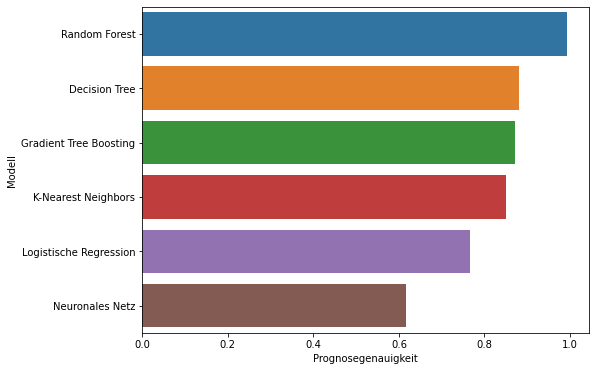

In [31]:
# Darstellung als Säulendiagramm
plt.figure(figsize=(8, 6))
bar_class_1 = sns.barplot(y=df_class_step_1.index, x='Prognosegenauigkeit', data=df_class_step_1, orient='h')

In [32]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Bei einer Modellbildung ohne Datensplit und ohne Hyperparameter Optimierung performt der Random Forest mit einer Accuracy nahe 1 am besten, gefolgt vom Decision Tree und Gradient Tree Boosting. Das Neuronale Netz ist mit einer Accuracy von nur ca. 0,7 weit abgeschlagen.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

## Step 2: Modell Training und Evaluation

### a) Aufteilung in Test- bzw. Holdout-Daten 

Ziel der Modellbildung im vorliegenden Kontext ist es, die Modelle auf Datenmengen anzuwenden, für die es noch keine Zielvariable (also ob gekauft wird oder nicht) vorliegt. Es ist daher nicht dienlich, die Modelle auf dem gesamten Datensatz zu trainieren. Stattdessen wird der vorliegende Datensatz im Folgenden aufgeteilt, sodass ein Teil der Daten zurückgehalten wird - die sog. Test- bzw. Holdout-Daten.

Damit soll das Problem der Überanpassung vermieden werden. In der Modellbildung gibt es einen Tradeoff zwischen Under- und Overfitting: Einerseits soll das Modell nicht zu einfach, sondern universell genug sein, um die Abhängigkeiten im Datensatz erlernen zu können. Andererseits darf das Modell nicht zu komplex und damit überangepasst sein, sodass es auch gut auf neue Daten verallgemeinern kann.

In [33]:
##### Der Datensplit gilt für alle Klassifikationsmodelle gleichermaßen

# Vorbereitung & Importe
from sklearn.model_selection import train_test_split

# Zuweisung von X und Y
X = df[predictor_attributes]
Y = df['Kauf']

# Aufteilung des Datensatzes
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, stratify=Y)

print("Der Trainingsdatensatz enthält",len(X_train), "Datensätze für X. \n")
print("Der Trainingsdatensatz enthält",len(Y_train), "Datensätze für Y. \n")
unique, counts = np.unique(Y_train, return_counts=True)
print("Der Trainingsdatensatz enthält zu ",(counts[1]/len(Y_train))*100, "Prozent Datensätze der Klasse Kauf. \n")

print("Der Validierungsdatensatz enthält",len(X_test), "Datensätze für X. \n")
print("Der Validierungsdatensatz enthält",len(Y_test), "Datensätze für Y. \n")
unique, counts = np.unique(Y_test, return_counts=True)
print("Der Validierungsdatensatz enthält zu",(counts[1]/len(Y_test))*100, "Prozent Datensätze der Klasse Kauf. \n")

Der Trainingsdatensatz enthält 1275 Datensätze für X. 

Der Trainingsdatensatz enthält 1275 Datensätze für Y. 

Der Trainingsdatensatz enthält zu  50.03921568627451 Prozent Datensätze der Klasse Kauf. 

Der Validierungsdatensatz enthält 425 Datensätze für X. 

Der Validierungsdatensatz enthält 425 Datensätze für Y. 

Der Validierungsdatensatz enthält zu 49.88235294117647 Prozent Datensätze der Klasse Kauf. 



### b) Prognosegenauigkeit der Klassifikationsmodelle basierend auf Trainingsdaten

In [34]:
##### Decision Tree

# Fitting des Decision Tree Algorithmus auf den Trainingsdaten mit der Zielvariable 'Kauf' und den Eingabevariablen 'predictor_attributes'
decision_tree_train = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)
decision_tree_train.fit(X_train, Y_train)

# Der Decision Tree Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("Prognosegenauigkeit Decision Tree:\n")
print("Trainingsdaten:\t", decision_tree_train.score(X_train, Y_train))
print("Testdaten:\t", decision_tree_train.score(X_test, Y_test))


##### Random Forest

# Fitting des Random Forest Algorithmus auf den Trainingsdaten mit der Zielvariable 'Kauf' und den Eingabevariablen 'predictor_attributes'
random_forest_train = RandomForestClassifier(random_state=1)
random_forest_train.fit(X_train, Y_train)

# Der Random Forest Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Random Forest:\n")
print("Trainingsdaten:\t", random_forest_train.score(X_train, Y_train))
print("Testdaten:\t", random_forest_train.score(X_test, Y_test))


##### Logistic Regression

# Fitting des Logistic Regression Algorithmus auf den Trainingsdaten mit der Zielvariable 'Kauf' und den Eingabevariablen 'predictor_attributes'
logistic_regression_train = LogisticRegression(max_iter=1000)
logistic_regression_train.fit(X_train, Y_train)

# Der Logistic Regression Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Logistic Regression:\n")
print("Trainingsdaten:\t", logistic_regression_train.score(X_train, Y_train))
print("Testdaten:\t", logistic_regression_train.score(X_test, Y_test))


##### K-Nearest Neighbors

# Fitting des K-Nearest Neighbors Algorithmus auf den Trainingsdaten mit der Zielvariable 'Kauf' und den Eingabevariablen 'predictor_attributes'
knn_train = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_train.fit(X_train, Y_train)

# Der K-Nearest Neighbors Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit K-Nearest Neighbors:\n")
print("Trainingsdaten:\t", knn_train.score(X_train, Y_train))
print("Testdaten:\t", knn_train.score(X_test, Y_test))

##### Neuronales Netz

# Fitting des Neuronalen Netz Algorithmus auf den Trainingsdaten mit der Zielvariable 'Kauf' und den Eingabevariablen 'predictor_attributes'
neuronales_netz_train = MLPClassifier(max_iter=1000)
neuronales_netz_train.fit(X_train, Y_train)

# Der Neuronales Netz Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Neuronales Netz:\n")
print("Trainingsdaten:\t", neuronales_netz_train.score(X_train, Y_train))
print("Testdaten:\t", neuronales_netz_train.score(X_test, Y_test))

##### Gradient Tree Boosting

# Fitting des Gradient Boosting Algorithmus auf den Trainingsdaten mit der Zielvariable 'Kauf' und den Eingabevariablen 'predictor_attributes'
gradient_booosting_train = GradientBoostingClassifier()
gradient_booosting_train.fit(X_train, Y_train)

# Der Gradient Boosting Algorithmus auf Basis der Trainingsdaten liefert folgende Prognosegenauigkeit
print("\n\nPrognosegenauigkeit Gradient Tree Boosting:\n")
print("Trainingsdaten:\t", gradient_booosting_train.score(X_train, Y_train))
print("Testdaten:\t", gradient_booosting_train.score(X_test, Y_test))


Prognosegenauigkeit Decision Tree:

Trainingsdaten:	 0.8870588235294118
Testdaten:	 0.7670588235294118


Prognosegenauigkeit Random Forest:

Trainingsdaten:	 0.9968627450980392
Testdaten:	 0.7835294117647059


Prognosegenauigkeit Logistic Regression:

Trainingsdaten:	 0.7521568627450981
Testdaten:	 0.7623529411764706


Prognosegenauigkeit K-Nearest Neighbors:

Trainingsdaten:	 0.8368627450980393
Testdaten:	 0.6941176470588235


Prognosegenauigkeit Neuronales Netz:

Trainingsdaten:	 0.672156862745098
Testdaten:	 0.6752941176470588


Prognosegenauigkeit Gradient Tree Boosting:

Trainingsdaten:	 0.8713725490196078
Testdaten:	 0.8141176470588235


#### Tabellarisches Ranking der Prognosegenauigkeit mit Datensplit aber ohne Hyperparameter Optimierung

In [35]:
decision_tree = [ ('Decision Tree', decision_tree_train.score(X_train, Y_train), 'Training')]
#Create a DataFrame object
df_class_step_2b = pd.DataFrame(decision_tree, columns = ['Modell' , 'Prognosegenauigkeit', 'Data'])
#Add new ROW
df_class_step_2b.loc[1]=[ 'Decision Tree', decision_tree_train.score(X_test, Y_test), 'Test']
df_class_step_2b.loc[2]=[ 'Random Forest', random_forest_train.score(X_train, Y_train), 'Training']
df_class_step_2b.loc[3]=[ 'Random Forest', random_forest_train.score(X_test, Y_test), 'Test']
df_class_step_2b.loc[4]=[ 'Logistische Regression', logistic_regression_train.score(X_train, Y_train), 'Training']
df_class_step_2b.loc[5]=[ 'Logistische Regression', logistic_regression_train.score(X_test, Y_test), 'Test']
df_class_step_2b.loc[6]=[ 'K-Nearest Neighbors', knn_train.score(X_train, Y_train), 'Training']
df_class_step_2b.loc[7]=[ 'K-Nearest Neighbors', knn_train.score(X_test, Y_test), 'Test']
df_class_step_2b.loc[8]=[ 'Neuronales Netz', neuronales_netz_train.score(X_train, Y_train), 'Training']
df_class_step_2b.loc[9]=[ 'Neuronales Netz', neuronales_netz_train.score(X_test, Y_test), 'Test']
df_class_step_2b.loc[10]=[ 'Gradient Tree Boosting', gradient_booosting_train.score(X_train, Y_train), 'Training']
df_class_step_2b.loc[11]=[ 'Gradient Tree Boosting', gradient_booosting_train.score(X_test, Y_test), 'Test']

# Setze Spalte 'Modell' als Index
df_class_step_2b.set_index('Modell', inplace=True, drop=True)
# Absteigend sortieren
df_class_step_2b.sort_values(by='Prognosegenauigkeit', ascending=False, inplace=True)

df_class_step_2b

Prognosegenauigkeit      Data
Modell                                               
Random Forest                      0.996863  Training
Decision Tree                      0.887059  Training
Gradient Tree Boosting             0.871373  Training
K-Nearest Neighbors                0.836863  Training
Gradient Tree Boosting             0.814118      Test
Random Forest                      0.783529      Test
Decision Tree                      0.767059      Test
Logistische Regression             0.762353      Test
Logistische Regression             0.752157  Training
K-Nearest Neighbors                0.694118      Test
Neuronales Netz                    0.675294      Test
Neuronales Netz                    0.672157  Training

#### Graphisches Ranking der Prognosegenauigkeit mit Datensplit aber ohne Hyperparamter Optimierung

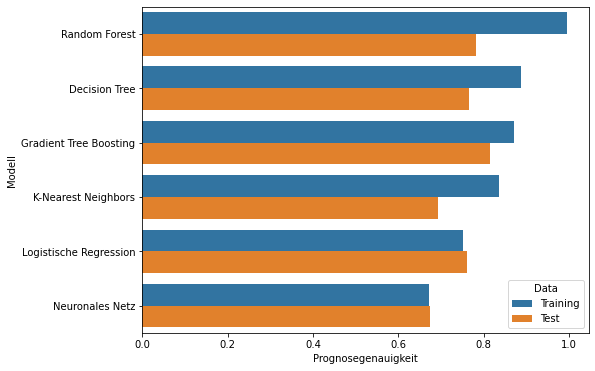

In [36]:
# Darstellung als Säulendiagramm
plt.figure(figsize=(8, 6))
bar_class_2 = sns.barplot(y=df_class_step_2b.index, x='Prognosegenauigkeit', hue='Data', data=df_class_step_2b, orient='h')

In [37]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
- Beim Random Forest, beim Decision Tree, beim Gradient Tree Boosting und bei K-nearest Neighbors  scheint Overfitting vorzuliegen, da die Modelle auf den Trainingsdaten jeweils (teilweise deutlich) besser performen als auf den Testdaten.
- Overfitting kann grds. nie gänzlich ausgeschlossen werden. Es gibt jedoch verschiedene Möglichkeiten, das Vorliegen von Overfittung zu erkennen und das Overfitting zu reduzieren. Einige dieser Möglichkeiten werden im weiteren Verlauf des Notebooks auf den Trainingsdatensatz angewendet.'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

### c) Graphische Darstellung der Prognosegenauigkeit mittels Confusion Matrix

Accuracy Decision Tree: 0.7671
Confusion Matrix: 
 [[159  54]
 [ 45 167]]
Accuracy Random Forest: 0.7835
Confusion Matrix: 
 [[165  48]
 [ 44 168]]
Accuracy Logistic Regression: 0.7624
Confusion Matrix: 
 [[167  46]
 [ 55 157]]
Accuracy K-Nearest Neighbors: 0.6941
Confusion Matrix: 
 [[161  52]
 [ 78 134]]
Accuracy Neuronales Netz: 0.7012
Confusion Matrix: 
 [[135  78]
 [ 49 163]]
Accuracy Gradient Tree Boosting: 0.8141
Confusion Matrix: 
 [[166  47]
 [ 32 180]]


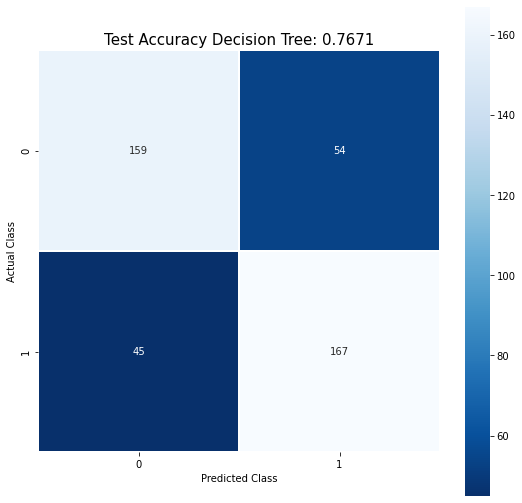

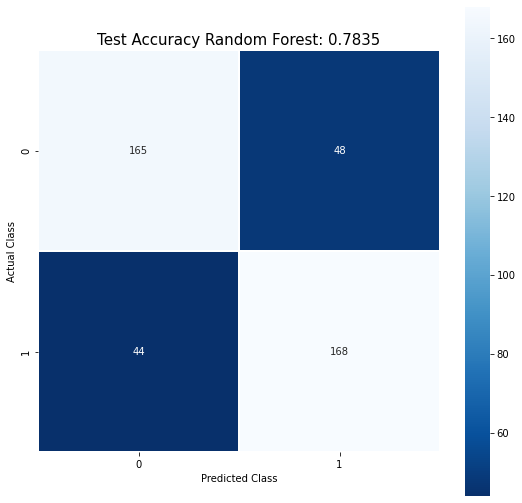

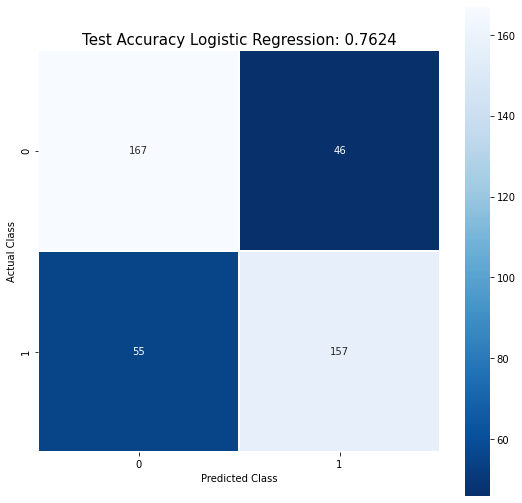

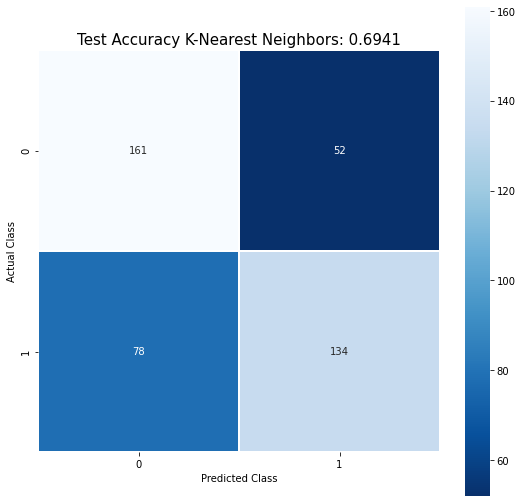

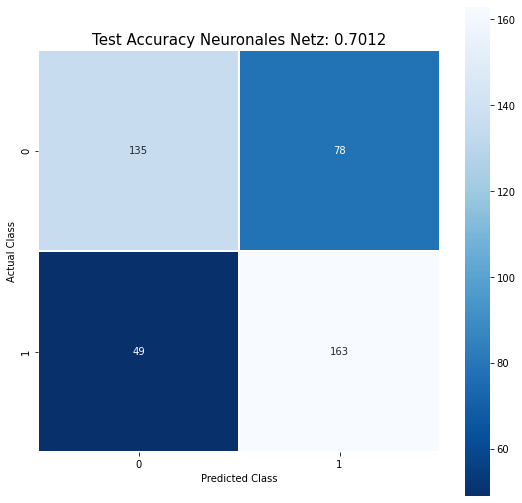

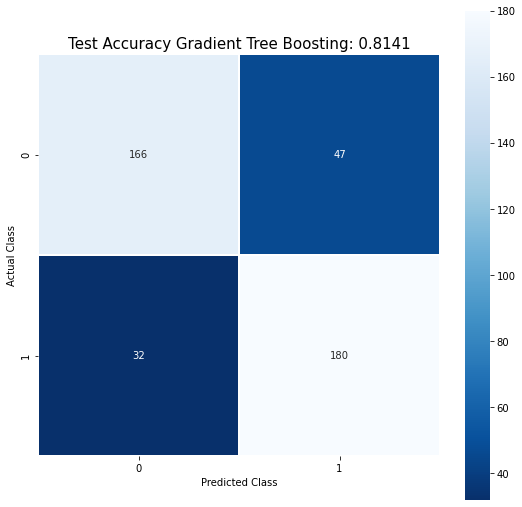

In [38]:
# Vorbereitung & Importe
from sklearn import metrics

##### Decision Tree

# Decision Tree Algorithmus aus b)
clf_tree = decision_tree_train.fit(X_train, Y_train)

# Prognosegenauigkeit
score_tree = clf_tree.score(X_test, Y_test)
print ("Accuracy Decision Tree: %0.4f" % (score_tree))

# Prognosen
predictions_tree = clf_tree.predict(X_test)
predictions_tree

# Definition der Confusion Matrix
cm_tree = metrics.confusion_matrix(Y_test, predictions_tree)
print("Confusion Matrix: \n", cm_tree)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_tree, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy Decision Tree: %0.4f" % (score_tree)
plt.title(all_sample_title, size = 15);


##### Random Forest

# Random Forest Algorithmus aus b)
clf_random_forest = random_forest_train.fit(X_train, Y_train)

# Prognosegenauigkeit
score_random_forest = clf_random_forest.score(X_test, Y_test)
print ("Accuracy Random Forest: %0.4f" % (score_random_forest))

# Prognosen
predictions_random_forest = clf_random_forest.predict(X_test)
predictions_random_forest

# Definition der Confusion Matrix
cm_random_forest = metrics.confusion_matrix(Y_test, predictions_random_forest)
print("Confusion Matrix: \n", cm_random_forest)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_random_forest, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy Random Forest: %0.4f" % (score_random_forest)
plt.title(all_sample_title, size = 15);


##### Logistic Regression

# Logistic Regression Algorithmus aus b)
clf_logreg = logistic_regression_train.fit(X_train, Y_train)

# Prognosegenauigkeit
score_logreg = clf_logreg.score(X_test, Y_test)
print ("Accuracy Logistic Regression: %0.4f" % (score_logreg))

# Prognosen
predictions_logreg = clf_logreg.predict(X_test)
predictions_logreg

# Definition der Confusion Matrix
cm_logreg = metrics.confusion_matrix(Y_test, predictions_logreg)
print("Confusion Matrix: \n", cm_logreg)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_logreg, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy Logistic Regression: %0.4f" % (score_logreg)
plt.title(all_sample_title, size = 15);


##### K-Nearest Neighbors

# K-Nearest Neighbors Algorithmus aus b)
clf_knn = knn_train.fit(X_train, Y_train)

# Prognosegenauigkeit
score_knn = clf_knn.score(X_test, Y_test)
print ("Accuracy K-Nearest Neighbors: %0.4f" % (score_knn))

# Prognosen
predictions_knn = clf_knn.predict(X_test)
predictions_knn

# Definition der Confusion Matrix
cm_knn = metrics.confusion_matrix(Y_test, predictions_knn)
print("Confusion Matrix: \n", cm_knn)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_knn, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy K-Nearest Neighbors: %0.4f" % (score_knn)
plt.title(all_sample_title, size = 15);


##### Neuronales Netz

# Neuronales Netz Algorithmus aus b)
clf_neuronales_netz = neuronales_netz_train.fit(X_train, Y_train)

# Prognosegenauigkeit
score_neuronales_netz = clf_neuronales_netz.score(X_test, Y_test)
print ("Accuracy Neuronales Netz: %0.4f" % (score_neuronales_netz))

# Prognosen
predictions_neuronales_netz = clf_neuronales_netz.predict(X_test)
predictions_neuronales_netz

# Definition der Confusion Matrix
cm_neuronales_netz = metrics.confusion_matrix(Y_test, predictions_neuronales_netz)
print("Confusion Matrix: \n", cm_neuronales_netz)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_neuronales_netz, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy Neuronales Netz: %0.4f" % (score_neuronales_netz)
plt.title(all_sample_title, size = 15);


##### Gradient Tree Boosting

# Gradient Tree Boosting Algorithmus aus b)
clf_gradient_boosting = gradient_booosting_train.fit(X_train, Y_train)

# Prognosegenauigkeit
score_gradient_boosting = clf_gradient_boosting.score(X_test, Y_test)
print ("Accuracy Gradient Tree Boosting: %0.4f" % (score_gradient_boosting))

# Prognosen
predictions_gradient_boosting = clf_gradient_boosting.predict(X_test)
predictions_gradient_boosting

# Definition der Confusion Matrix
cm_gradient_boosting = metrics.confusion_matrix(Y_test, predictions_gradient_boosting)
print("Confusion Matrix: \n", cm_gradient_boosting)

# Visualisierung der Confusion Matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm_gradient_boosting, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Class');
plt.xlabel('Predicted Class');
all_sample_title = "Test Accuracy Gradient Tree Boosting: %0.4f" % (score_gradient_boosting)
plt.title(all_sample_title, size = 15);

In [39]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Mithilfe einer Konfusionsmatrix kann überprüft werden, ob die Prognose einer Klassifikation richtiger-/fälschlicherweise wahr oder falsch ist.
- True Positives: Positives Ergebnis vorhergesagt; Positives wahres Ergebnis
- False Positives: Positives Ergebnis vorhergesagt; Negatives wahres Ergebnis
- True Negatives: Negativ Ergebnis vorhergesagt; Negatives wahres Ergebnis
- False Negatives: Negatives Ergebnis vorhergesagt; Positives wahres Ergebnis

Die Confusion Matrix gibt Aufschluss über die Fehler 1. Art (False Positives) und die Fehler 2. Art (False Negatives).
Im vorliegenden Kontext bedeutet ein Fehler 1. Art, dass ein Kauf vorhergesagt wurde, der aber tatsächlich nicht stattfindet. In diesem Fall wären die Kosten zur werblichen Ansprache vergeblich aufgewendet worden.
Ein Fehler 2. Art bedeutet hier wiederum, dass ein Kunde nicht angesprochen wurde, weil kein Kauf prognostiziert wurde, der Kunde in Wirklichkeit aber gekauft hätte. Folglich fallen Opportunitätskosten in Höhe des entgangenen Umsatzes an.

Die geringste Anzahl an Fehlern 1. Art (False Positives) finden wir beim Neuronalen Netz vor, gefolgt von der Logistischen Regression und Gradient Tree Boosting.

Hinsichtlich der Fehler 2. Art liegt Gradient Tree Boosting vorne, dahinter Random Forest und Decision Tree.

Die Accuracy auf den Testdaten ist in dieser Darstellungsform bei Gradient Tree Boosting am größen.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

### d) Kreuzvalidierung

Auch wenn die Aufteilung in Trainings- und Testdaten die Modellbildung verlässlicher macht, birgt sie den Nachteil, dass auf diese Weise ein Teil der Daten (die Testdaten) nicht zur Modellbildung genutzt werden kann. Die Kreuzvalidierung liefert hiefür einen Lösungsansatz, indem sie die Daten in mehrere Teilmengen aufteilt, von denen jede im Rahmen mehrerer Durchläufe jeweils einmal als Testdaten genutzt wird, während die übrigen Teilmengen die Trainingsdaten bilden. Anschließend kann die durchschnittliche Performance der verschiedenen Durchläufe gemessen werden.

#### K-Fold Cross Validation

In [40]:
# Vorbereitung & Importe
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv_kfold = KFold(n_splits = 10)


##### Decision Tree

# Decision Tree Algorithmus aus c)
clf_tree_kfold = DecisionTreeClassifier(max_depth=10, criterion="entropy", random_state=1)

# Prognosegenauigkeit
score_tree_kfold = cross_val_score(clf_tree_kfold, X, Y, cv = cv_kfold)



##### Random Forest

# Random Forest Algorithmus aus c)
clf_random_forest_kfold = RandomForestClassifier(random_state=1)

# Prognosegenauigkeit
score_random_forest_kfold = cross_val_score(clf_random_forest_kfold, X, Y, cv = cv_kfold)



##### Logistic Regression

# Logistic Regression Algorithmus aus c)
clf_logreg_kfold = LogisticRegression(max_iter=1000)

# Prognosegenauigkeit
score_logreg_kfold = cross_val_score(clf_logreg_kfold, X, Y, cv = cv_kfold)


##### K-Nearest Neighbors

# K-Nearest Neighbors Algorithmus aus c)
clf_knn_kfold = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Prognosegenauigkeit
score_knn_kfold = cross_val_score(clf_knn_kfold, X, Y, cv = cv_kfold)



##### Neuronales Netz

# Neuronales Netz Algorithmus aus c)
clf_neuronales_netz_kfold = MLPClassifier(max_iter=1000)

# Prognosegenauigkeit
score_neuronales_netz_kfold = cross_val_score(clf_neuronales_netz_kfold, X, Y, cv = cv_kfold)



##### Gradient Tree Boosting

# Gradient Boosting Algorithmus aus c)
clf_gradient_boosting_kfold = GradientBoostingClassifier()

# Prognosegenauigkeit
score_gradient_boosting_kfold = cross_val_score(clf_gradient_boosting_kfold, X, Y, cv = cv_kfold)


df_plot_kfold_class = pd.DataFrame(
        {'Decision Tree': score_tree_kfold,
         'Random Forest': score_random_forest_kfold,
         'Logistic Regression': score_logreg_kfold,
         'K-Nearest Neighbors': score_knn_kfold,
         'Neuronales Netz': score_neuronales_netz_kfold,
         'Gradient Tree Boosting': score_gradient_boosting_kfold}
)

display(df_plot_kfold_class.describe())

Decision Tree  Random Forest  Logistic Regression  K-Nearest Neighbors  \
count      10.000000      10.000000            10.000000            10.000000   
mean        0.784118       0.801765             0.758824             0.700000   
std         0.014153       0.029872             0.017538             0.035942   
min         0.764706       0.752941             0.735294             0.647059   
25%         0.772059       0.783824             0.747059             0.675000   
50%         0.788235       0.800000             0.755882             0.694118   
75%         0.794118       0.811765             0.769118             0.727941   
max         0.800000       0.852941             0.788235             0.758824   

       Neuronales Netz  Gradient Tree Boosting  
count        10.000000               10.000000  
mean          0.632353                0.819412  
std           0.093431                0.032344  
min           0.488235                0.764706  
25%           0.551471                0.798529  
50%           0.673529                0.817647  
75%           0.692647                0.838235  
max           0.752941                0.864706

#### Graphisches Ranking der Prognosegenauigkeit nach Kreuzvalidierung aber ohne Hyperparamter Optimierung

In [41]:
# Darstellung als Boxplot
fig = px.box(df_plot_kfold_class)
fig.update_layout(
    title='K-Fold Cross Validation',
    xaxis_title='Modelle',
    yaxis_title=' ',
)

In [42]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
- Von den sechs Modellen performt Gradient Tree Boosting bei der Kreuzvalidierung am besten, gefolgt vom Random Forest.
- Die Performance des Neuronale Netzes ist im Vergleich zu den anderen Modellen unterdurchschnittlich.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

### e) Lernkurve

Die Lernkurve zeigt die Performance eines Modells auf den Testdaten in Abhängigkeit von der Anzahl der Trainingsdaten. 

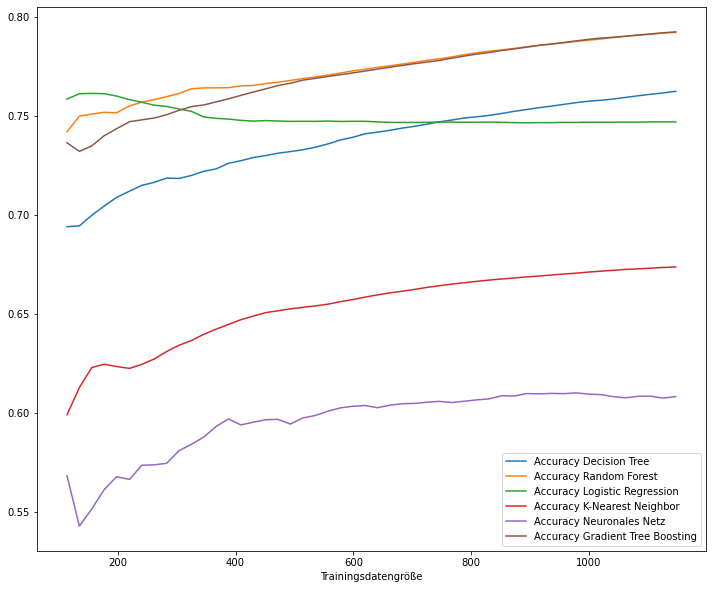

In [43]:
# Vorbereitung & Importe
from sklearn.model_selection import learning_curve

# Unterdrücken von Convergence Warnungen, da max-iter aus Performancegründen bewusst nicht weiter erhöht wird
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

##### Decision Tree

# Definition der Lernkurve für Decision Tree auf Basis der Trainingsdatengröße
train_sizes_tree, train_scores_tree, test_scores_tree = learning_curve(
    DecisionTreeClassifier(criterion = 'entropy') , X_train, Y_train, train_sizes = np.linspace(0.1, 1.0, 50), cv=10
)   

# Bestimmung der Prognosegenauigkeit für Decision Tree bezogen auf Trainingsdatengröße
mean_test_scores_tree = []
for i in range(1,len(test_scores_tree)+1):
    mean_test_scores_tree.append(test_scores_tree[:i].mean())
    
    
##### Random Forest

# Definition der Lernkurve für Random Forest auf Basis der Trainingsdatengröße
train_sizes_random_forest, train_scores_random_forest, test_scores_random_forest= learning_curve(
    RandomForestClassifier(criterion="entropy") , X_train, Y_train, train_sizes = np.linspace(0.1, 1.0, 50), cv=10
)

# Bestimmung der Prognosegenauigkeit für Random Forest bezogen auf Trainingsdatengröße
mean_test_scores_random_forest = []
for i in range(1,len(test_scores_random_forest)+1):
    mean_test_scores_random_forest.append(test_scores_random_forest[:i].mean())
    

##### Logistic Regression

# Definition der Lernkurve für Logistic Regression auf Basis der Trainingsdatengröße
train_sizes_logreg, train_scores_logreg, test_scores_logreg = learning_curve(
    LogisticRegression(max_iter=1000) , X_train, Y_train, train_sizes = np.linspace(0.1, 1.0, 50), cv=10
)

# Bestimmung der Prognosegenauigkeit für Random Forest bezogen auf Trainingsdatengröße
mean_test_scores_logreg = []
for i in range(1,len(test_scores_logreg)+1):
    mean_test_scores_logreg.append(test_scores_logreg[:i].mean())

    
##### K-Nearest Neighbors

# Definition der Lernkurve für K-Nearest Neighbors auf Basis der Trainingsdatengröße
train_sizes_knn, train_scores_knn, test_scores_knn = learning_curve(
    KNeighborsClassifier(n_neighbors=3, metric='euclidean') , X_train, Y_train, train_sizes = np.linspace(0.1, 1.0, 50), cv=10
)

# Bestimmung der Prognosegenauigkeit für  K-Nearest Neighbors bezogen auf Trainingsdatengröße
mean_test_scores_knn = []
for i in range(1,len(test_scores_knn)+1):
    mean_test_scores_knn.append(test_scores_knn[:i].mean())

    
##### Neuronales Netz

# Definition der Lernkurve für Neuronales Netz auf Basis der Trainingsdatengröße
train_sizes_neuronales_netz, train_scores_neuronales_netz, test_scores_neuronales_netz = learning_curve(
    MLPClassifier(max_iter=1000) , X_train, Y_train, train_sizes = np.linspace(0.1, 1.0, 50), cv=10
)

# Bestimmung der Prognosegenauigkeit für Neuronales Netz bezogen auf Trainingsdatengröße
mean_test_scores_neuronales_netz = []
for i in range(1,len(test_scores_neuronales_netz)+1):
    mean_test_scores_neuronales_netz.append(test_scores_neuronales_netz[:i].mean())
    

    
##### Gradient Tree Boosting

# Definition der Lernkurve für Gradient Tree Boosting auf Basis der Trainingsdatengröße
train_sizes_gradient_boosting, train_scores_gradient_boosting, test_scores_gradient_boosting = learning_curve(
    GradientBoostingClassifier() , X_train, Y_train, train_sizes = np.linspace(0.1, 1.0, 50), cv=10
)

# Bestimmung der Prognosegenauigkeit für Gradient Tree Boosting bezogen auf Trainingsdatengröße
mean_test_scores_gradient_boosting = []
for i in range(1,len(test_scores_gradient_boosting)+1):
    mean_test_scores_gradient_boosting.append(test_scores_gradient_boosting[:i].mean())
    

df_plot = pd.DataFrame(
        {'Trainingsdatengröße': train_sizes_tree,
         'Accuracy Decision Tree': mean_test_scores_tree,
         'Accuracy Random Forest': mean_test_scores_random_forest,
         'Accuracy Logistic Regression': mean_test_scores_logreg,
         'Accuracy K-Nearest Neighbor': mean_test_scores_knn,
         'Accuracy Neuronales Netz': mean_test_scores_neuronales_netz,
         'Accuracy Gradient Tree Boosting': mean_test_scores_gradient_boosting}
)

learning_curve = df_plot.plot(kind='line', x='Trainingsdatengröße', y=['Accuracy Decision Tree', 'Accuracy Random Forest', 'Accuracy Logistic Regression', 'Accuracy K-Nearest Neighbor', 'Accuracy Neuronales Netz', 'Accuracy Gradient Tree Boosting'], figsize=(12,10))

In [44]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Die Lernkurve bestätigt die bereits gewonnenen Erkenntnisse über die Performance der verschiedenenen Modelle. Gradient Tree Boosting und der Random Forest performen grds. weiterhin am besten, wenn auch die logistische Regression bei einer geringen Anzahl an Trainingsdaten etwas besser performt. Auch im Hinblick auf die Lernkurve ist das Neuronale Netz weit abgeschlagen.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

## Step 3: Modell Optimierung

### a) Identifikation der jeweiligen Hyperparameter der verschiedenen Klassifikationsmodelle

Ein Hyperparameter ist ein Parameter, der zur Steuerung des Trainingsalgorithmus verwendet wird und dessen Wert im Gegensatz zu anderen Parametern vor dem eigentlichen Training des Modells festgelegt werden muss.

Die Rastersuche oder Grid Search ist der traditionelle Weg, nach optimalen Hyperparametern zu suchen.

Bevor wir eine Grid Search für die verschiedenen Klassifikationsmodelle durchführen, um nach optimalen Parametern zu suchen, werden wir im Folgenden zunächst die standardmäßigen Hyperparameter in sklearn identifizieren.

#### Decision Tree

In [45]:
# Der nachfolgende Output zeigt die Default Hyperparameter, die in sklearn verwendet werden

estimator_tree_class=DecisionTreeClassifier()
estimator_tree_class.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

#### Random Forest

In [46]:
# Der nachfolgende Output zeigt die Default Hyperparameter, die in sklearn verwendet werden

estimator_random_forest_class=RandomForestClassifier()
estimator_random_forest_class.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Logistic Regression

In [47]:
# Der nachfolgende Output zeigt die Default Hyperparameter, die in sklearn verwendet werden

estimator_logreg=LogisticRegression(max_iter=1000)
estimator_logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

#### K-Nearest Neighbors

In [48]:
# Der nachfolgende Output zeigt die Default Hyperparameter, die in sklearn verwendet werden

estimator_knn_class=KNeighborsClassifier()
estimator_knn_class.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### Neuronales Netz

In [49]:
# Der nachfolgende Output zeigt die Default Hyperparameter, die in sklearn verwendet werden

estimator_neuronales_netz_class = MLPClassifier()
estimator_neuronales_netz_class.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

#### Gradient Boosting



In [50]:
# Der nachfolgende Output zeigt die Default Hyperparameter, die in sklearn verwendet werden

estimator_gradient_boosting_class = GradientBoostingClassifier()
estimator_gradient_boosting_class.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### b) Grid Search zur Optimierung ausgewählter Hyperparameter

Aus Effizienz- und Performance-Gründen werden nicht alle zuvor identifizierten Hyperparameter für die jeweiligen Klassifikationsmodelle optimiert, sondern nur die jeweils relevantesten. Außerdem beschränken sich die zu testenden Kombinationen von Hyperparametern für jedes Modell auf Werte in einer Größenordnung, die zuvor auf eine trial-and-error-basierte Vorgehensweise eingegrenzt wurde.

Einige Kombinationen wurden bewusst ausgelassen, um Fehlermeldungen / Warnmeldungen aufzulösen. Beispielsweise gibt es für die Logistic Regression drei weitere penalty Werte, jedoch sind die gewählten solver nur mit penalty l2 kombinierbar.

In [51]:
# Vorbereitung & Importe
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Unterdrücken von Convergence Warnungen, da max-iter aus Performancegründen bewusst nicht weiter erhöht wird
simplefilter("ignore", category=ConvergenceWarning)


##### Decision Tree

# Definition des Modells und der Hyperparameter
estimator_tree_class = DecisionTreeClassifier(random_state=1)
range_max_depth = np.arange(start=15, stop=20, step=1, dtype=int)
range_min_samples_split = np.arange(start=8, stop=14, step=2, dtype=int)
range_min_samples_leaf = np.arange(start=1, stop=5, step=1, dtype=int)

# Definition der Grid Search
grid_tree_class = dict(max_depth=range_max_depth, min_samples_split=range_min_samples_split, min_samples_leaf=range_min_samples_leaf)

cv_rs_kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_tree_class = GridSearchCV(estimator=estimator_tree_class, param_grid=grid_tree_class, n_jobs=-1, cv=cv_rs_kfold, scoring='accuracy',error_score=0)
grid_result_tree_class = grid_search_tree_class.fit(X_train, Y_train)

#print("\nErgebnisse der Hyperparameter Suche auf den Trainingsdaten für Decision Tree\n")
#print("Beste Accuracy:\t\t %.3f" % grid_search_tree_class.best_score_)
#print("Beste Hyperparameter:\t %s" % grid_search_tree_class.best_params_)
#print("Bester Estimator:\t %s" % grid_search_tree_class.best_estimator_)

best_tree_class = grid_search_tree_class.best_estimator_
best_tree_class.fit(X_train, Y_train)
#print("\nAccuracy auf Validierungsdaten mit Hyperparameter Optimierung für Decision Tree:\t\t %.3f" % best_tree_class.score(X_test, Y_test))


##### Random Forest 

# Definition des Modells und der Hyperparameter
estimator_random_forest_class = RandomForestClassifier(random_state=1)

# Definition der Grid Search
grid_random_forest_class = dict(n_estimators=[285, 300], max_depth=[22, 23],
                     min_samples_split=[8, 9], min_samples_leaf=[1, 2])

cv_rs_kfold = RepeatedStratifiedKFold(n_splits=10)
grid_search_random_forest_class = GridSearchCV(estimator=estimator_random_forest_class, param_grid=grid_random_forest_class, n_jobs=-1, cv=cv_rs_kfold, scoring='accuracy',error_score=0)
grid_result_random_forest_class = grid_search_random_forest_class.fit(X_train, Y_train)

#print("\nErgebnisse der Hyperparameter Suche auf den Trainingsdaten für Random Forest\n")
#print("Beste Accuracy:\t\t %.3f" % grid_search_random_forest_class.best_score_)
#print("Beste Hyperparameter:\t %s" % grid_search_random_forest_class.best_params_)
#print("Bester Estimator:\t %s" % grid_search_random_forest_class.best_estimator_)

best_random_forest_class = grid_search_random_forest_class.best_estimator_
best_random_forest_class.fit(X_train, Y_train)
#print("\nAccuracy auf Validierungsdaten mit Hyperparameter Optimierung für Random Forest:\t\t %.3f" % best_random_forest_class.score(X_test, Y_test))


##### Logistic Regression

# Definition des Modells und der Hyperparameter
estimator_logreg = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Definition der Grid Search
grid_logreg = dict(solver=solvers,penalty=penalty,C=c_values)
cv_rs_kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_logreg = GridSearchCV(estimator=estimator_logreg, param_grid=grid_logreg, n_jobs=-1, cv=cv_rs_kfold, scoring='accuracy',error_score=0)
grid_result_logreg = grid_search_logreg.fit(X_train, Y_train)

#print("\nErgebnisse der Hyperparameter Suche auf den Trainingsdaten für Logistic Regression\n")
#print("Beste Accuracy:\t\t %.3f" % grid_search_logreg.best_score_)
#print("Beste Hyperparameter:\t %s" % grid_search_logreg.best_params_)
#print("Bester Estimator:\t %s" % grid_search_logreg.best_estimator_)

best_logreg = grid_search_logreg.best_estimator_
best_logreg.fit(X_train, Y_train)
#print("\nAccuracy auf Validierungsdaten mit Hyperparameter Optimierung für Logistic Regression:\t\t %.3f" % best_logreg.score(X_test, Y_test))


##### K-Nearest Neighbors

# Definition des Modells und der Hyperparameter
estimator_knn_class = KNeighborsClassifier()
n = 10
range_k = np.arange(start=1, stop=(len(X_train)+1)*((n-1)/n), step=1, dtype=int) #Alle Möglichen k-Werte angeben in der Range von 1 bis n*9/10 da n=10 

# Pipeline mit Scaler und Klassifizierer 
pipe_class = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(metric='euclidean'))])

# Definition der Grid Search
#Durchlauf dauert sehr lange, deshalb im folgenden nur die optimalen Hyperparameter:
#grid_knn = [ 
  #  {'knn__n_neighbors': range_k,
  # 'knn__weights': ['uniform', 'distance']}
#]

grid_knn_class = [ 
    {'knn__n_neighbors': [4],
    'knn__weights': ['distance']}
]

cv_rs_kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_knn_class = GridSearchCV(estimator=pipe_class, param_grid=grid_knn_class, n_jobs=-1, cv=cv_rs_kfold, scoring='accuracy',error_score=0)
grid_result_knn_class = grid_search_knn_class.fit(X_train, Y_train)

#print("\nErgebnisse der Hyperparameter Suche auf den Trainingsdaten für K-Nearest Neighbors\n")
#print("Beste Accuracy:\t\t %.3f" % grid_search_knn_class.best_score_)
#print("Beste Hyperparameter:\t %s" % grid_search_knn_class.best_params_)
#print("Bester Estimator:\t %s" % grid_search_knn_class.best_estimator_)

best_knn_class = grid_search_knn_class.best_estimator_
best_knn_class.fit(X_train, Y_train)
#print("\nAccuracy auf Validierungsdaten mit Hyperparameter Optimierung für K-Nearest Neighbors:\t\t %.3f" % best_knn_class.score(X_test, Y_test))

##### Neuronales Netz

# Definition des Modells und der Hyperparameter
estimator_neuronales_netz_class = MLPClassifier()

# Definition der Grid Search

#Durchlauf dauert sehr lange:
#grid_neuronales_netz = [ 
    #{'hidden_layer_sizes': [(14,1)],
    #'activation': ['tanh', 'relu','logistic'],
    #'solver': ['sgd', 'adam' , 'lbfgs'],
    #'alpha': [0.0001, 0.05],
    #'learning_rate': ['constant',"invscaling",'adaptive'],
    #'max_iter': [300,500,1000],
    #'random_state': [1] }
#]
#Ergebnis des Durchlaufes:
#Deshalb hier nur das optimale Modell als Ergebnis des oben auskommentierten Durchlaufes:
grid_neuronales_netz_class = [ 
     {'hidden_layer_sizes': [(14,1)],
    'activation': ['logistic'],
    'solver': ['lbfgs'],
    'max_iter': [300],
    'random_state': [1] }
]

#hidden_layer_sizes : This parameter allows us to set the number of layers and the number of nodes we wish to have in the Neural Network Classifier. Each element in the tuple represents the number of nodes at the ith position where i is the index of the tuple. Thus the length of tuple denotes the total number of hidden layers in the network.
#activation: The activation function for the hidden layers.
#solver: This parameter specifies the algorithm for weight optimization across the nodes.
#max_iter: It denotes the number of epochs.
#random_state: The parameter allows to set a seed for reproducing the same results

cv_rs_kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_neuronales_netz_class = GridSearchCV(estimator=estimator_neuronales_netz_class, param_grid=grid_neuronales_netz_class, n_jobs=-1, cv=cv_rs_kfold, scoring='accuracy',error_score=0)
grid_result_neuronales_netz_class = grid_search_neuronales_netz_class.fit(X_train, Y_train)

#print("\nErgebnisse der Hyperparameter Suche auf den Trainingsdaten für Neuronales Netz\n")
#print("Beste Accuracy:\t\t %.3f" % grid_search_neuronales_netz_class.best_score_)
#print("Beste Hyperparameter:\t %s" % grid_search_neuronales_netz_class.best_params_)
#print("Bester Estimator:\t %s" % grid_search_neuronales_netz_class.best_estimator_)

best_neuronales_netz_class = grid_search_neuronales_netz_class.best_estimator_
best_neuronales_netz_class.fit(X_train, Y_train)
#print("\nAccuracy auf Validierungsdaten mit Hyperparameter Optimierung für Neuronales Netz:\t\t %.3f" % best_neuronales_netz_class.score(X_test, Y_test))

##### Gradient Tree Boosting

# Definition des Modells und der Hyperparameter
estimator_gradient_boosting_class = GradientBoostingClassifier()

# Definition der Grid Search
grid_gradient_boosting_class = [
  {'loss': ['exponential'],
   'learning_rate': [0.1],
   'n_estimators':[250],
   'max_depth':[3],
  'min_samples_split':[20], 
  'min_samples_leaf':[3],
  'max_features':[6],
   'subsample':[0.85],
  'random_state': [1],
  'criterion': ['mse']}
]
cv_rs_kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_gradient_boosting_class = GridSearchCV(estimator=estimator_gradient_boosting_class, param_grid=grid_gradient_boosting_class, n_jobs=-1, cv=cv_rs_kfold, scoring='accuracy',error_score=0)
grid_result_gradient_boosting_class = grid_search_gradient_boosting_class.fit(X_train, Y_train)

#print("\nErgebnisse der Hyperparameter Suche auf den Trainingsdaten für Gradient Tree Boosting\n")
#print("Beste Accuracy:\t\t %.3f" % grid_search_gradient_boosting_class.best_score_)
#print("Beste Hyperparameter:\t %s" % grid_search_gradient_boosting_class.best_params_)
#print("Bester Estimator:\t %s" % grid_search_gradient_boosting_class.best_estimator_)

best_gradient_boosting_class = grid_search_gradient_boosting_class.best_estimator_
best_gradient_boosting_class.fit(X_train, Y_train)
#print("\nAccuracy auf Validierungsdaten mit Hyperparameter Optimierung für Gradient Tree Boosting:\t %.3f" % best_gradient_boosting_class.score(X_test, Y_test))
print(' ')

#### Tabellarisches Ranking der Prognosegenauigkeit nach Hyperparameter Optimierung

In [52]:
decision_tree = [ ('Decision Tree', grid_search_tree_class.best_score_, grid_search_tree_class.best_params_, grid_search_tree_class.best_estimator_, best_tree_class.score(X_test, Y_test))]
#Create a DataFrame object
df_class_step_3b = pd.DataFrame(decision_tree, columns = ['Modell' , 'Beste Accuracy', 'Beste Hyperparameter', 'Bester Estimator', 'Optimierte Accuracy'])
#Add new ROW
df_class_step_3b.loc[1]=[ 'Random Forest', grid_search_random_forest_class.best_score_, grid_search_random_forest_class.best_params_, grid_search_random_forest_class.best_estimator_, best_random_forest_class.score(X_test, Y_test)]
df_class_step_3b.loc[2]=[ 'Logistische Regression', grid_search_logreg.best_score_, grid_search_logreg.best_params_, grid_search_logreg.best_estimator_, best_logreg.score(X_test, Y_test)]
df_class_step_3b.loc[3]=[ 'K-Nearest Neighbors', grid_search_knn_class.best_score_, grid_search_knn_class.best_params_, grid_search_knn_class.best_estimator_, best_knn_class.score(X_test, Y_test)]
df_class_step_3b.loc[4]=[ 'Neuronales Netz', grid_search_neuronales_netz_class.best_score_, grid_search_neuronales_netz_class.best_params_, grid_search_neuronales_netz_class.best_estimator_, best_neuronales_netz_class.score(X_test, Y_test)]
df_class_step_3b.loc[5]=[ 'Gradient Tree Boosting', grid_search_gradient_boosting_class.best_score_, grid_search_gradient_boosting_class.best_params_, grid_search_gradient_boosting_class.best_estimator_, best_gradient_boosting_class.score(X_test, Y_test)]

# Setze Spalte 'Modell' als Index
df_class_step_3b.set_index('Modell', inplace=True, drop=True)
# Absteigend sortieren
df_class_step_3b.sort_values(by='Optimierte Accuracy', ascending=False, inplace=True)

df_class_step_3b

Beste Accuracy  \
Modell                                   
Random Forest                 0.821028   
Gradient Tree Boosting        0.823554   
Neuronales Netz               0.707704   
Decision Tree                 0.789546   
Logistische Regression        0.749590   
K-Nearest Neighbors           0.728648   

                                                     Beste Hyperparameter  \
Modell                                                                      
Random Forest           {'max_depth': 22, 'min_samples_leaf': 1, 'min_...   
Gradient Tree Boosting  {'criterion': 'mse', 'learning_rate': 0.1, 'lo...   
Neuronales Netz         {'activation': 'logistic', 'hidden_layer_sizes...   
Decision Tree           {'max_depth': 17, 'min_samples_leaf': 1, 'min_...   
Logistische Regression     {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}   
K-Nearest Neighbors     {'knn__n_neighbors': 4, 'knn__weights': 'dista...   

                                                         Bester Estimator  \
Modell                                                                      
Random Forest           (DecisionTreeClassifier(max_depth=22, max_feat...   
Gradient Tree Boosting  ([DecisionTreeRegressor(max_depth=3, max_featu...   
Neuronales Netz         MLPClassifier(activation='logistic', hidden_la...   
Decision Tree           DecisionTreeClassifier(max_depth=17, min_sampl...   
Logistische Regression           LogisticRegression(C=100, max_iter=1000)   
K-Nearest Neighbors     (MinMaxScaler(), KNeighborsClassifier(metric='...   

                        Optimierte Accuracy  
Modell                                       
Random Forest                      0.811765  
Gradient Tree Boosting             0.809412  
Neuronales Netz                    0.790588  
Decision Tree                      0.776471  
Logistische Regression             0.767059  
K-Nearest Neighbors                0.738824

#### Graphisches Ranking der Prognosegenauigkeit nach Hyperparameter Optimierung

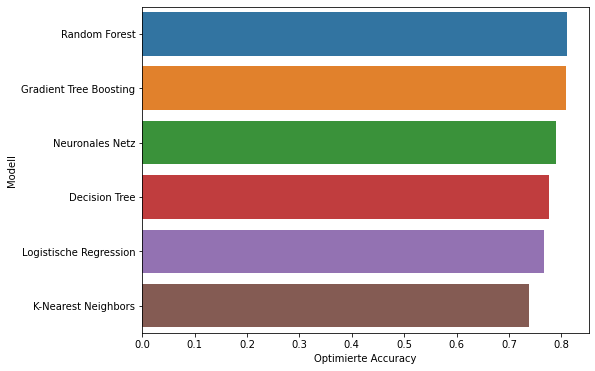

In [53]:
# Darstellung als Säulendiagramm
plt.figure(figsize=(8, 6))
bar_class_3 = sns.barplot(y=df_class_step_3b.index, x='Optimierte Accuracy', data=df_class_step_3b, orient='h')

In [54]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Mit optimalen Hyperparametern und in Bezug auf die Accuracy überholt der Random Forest Gradient Tree Boosting knapp. Interessanterweise belegt das Neuronale Netz jetzt den vierten Rang, obwohl es in den vorangegangenen Vergleichen eher unterdurchschnittlich performte. Nach der Hyperparameter-Optimierung bildet K-nearest Neighbors das Schlusslicht.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

### c) Verschachtelte Kreuzvalidierung

Eine allgemeine Methode zur Vermeidung von Overfitting ist die verschachtelte Kreuzvalidierung. Hierfür wird die Trainingsdatenmenge erneut in eine Trainingsuntermenge und eine Validierungsmenge aufgeteilt. Die Modellbildung basiert dann auf der Trainingsuntermenge und es werden die optimalen Hyperparameter anhand der Validierungsmenge abgeleitet. Anschließend wird ein neues Modell mit den abgeleiteten optimalen Hyperparametern auf den gesamten Trainingsdaten trainiert. So werden die Testdaten vollständig aus der Modellbildung heraus gehalten.

Im Folgenden werden den verschiedenen Modellen in manchen Fällen wie bei der Grid Search mehrere Ausprägungen je Hyperparameter zum Testen verschiedener Kombinationen mitgegeben. Aus Effizienz- und Performance-Gründen wird jedoch teilweise auch die zuvor aus einer trial-and-error-basierten Vorgehensweise abgeleitete optimale Ausprägung eines Hyperparameters vorgegeben.

In [55]:
# Unterdrücken von Convergence Warnungen, da max-iter aus Performancegründen bewusst nicht weiter erhöht wird
simplefilter("ignore", category=ConvergenceWarning)

# Definieren der inneren und äußeren Validierungsschleife
inner_cv = KFold(n_splits=10)
outer_cv = KFold(n_splits=10)


##### Decision Tree

# Definition des Modells und der Hyperparameter
estimator_tree_class = DecisionTreeClassifier(random_state=1)
range_max_depth = np.arange(start=1, stop=100, step=10, dtype=int)
range_min_samples_leaf = np.arange(start=1, stop=10, step=1, dtype=int)

# Definition der verschachtelten Kreuzvalidierung
grid_tree_class = [
    {'max_depth': range_max_depth},
    {'min_samples_split': [18]},
    {'min_samples_leaf': range_min_samples_leaf}
]

nested_tree_class = GridSearchCV(estimator=estimator_tree_class, param_grid=grid_tree_class, cv=inner_cv)
scores_tree_class =  cross_val_score(nested_tree_class, X, Y, cv=outer_cv)

#print("Accuracy Decision Tree: ")
#print("Mittelwert:\t\t %.3f" % scores_tree_class.mean())
#print("Standardabweichung:\t %.3f" % scores_tree_class.std())


##### Random Forest

# Definition des Modells und der Hyperparameter
estimator_forest_class = RandomForestClassifier(random_state=1)

# Definition der verschachtelten Kreuzvalidierung
grid_forest_class = dict(n_estimators=[260], max_depth=[20], min_samples_split=[8], min_samples_leaf=[1])

nested_forest_class = GridSearchCV(estimator=estimator_forest_class, param_grid=grid_forest_class, cv=inner_cv)
scores_forest_class =  cross_val_score(nested_forest_class, X, Y, cv=outer_cv)

#print("\nAccuracy Random Forest: ")
#print("Mittelwert:\t\t %.3f" % scores_forest_class.mean())
#print("Standardabweichung:\t %.3f" % scores_forest_class.std())


##### Logistische Regression

# Definition des Modells und der Hyperparameter
estimator_logreg = LogisticRegression(max_iter=1000)
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100]

# Definition der verschachtelten Kreuzvalidierung
grid_logreg = dict(solver=solvers,penalty=penalty,C=c_values)

nested_logreg = GridSearchCV(estimator=estimator_logreg, param_grid=grid_logreg, cv=inner_cv)
scores_logreg =  cross_val_score(nested_logreg, X, Y, cv=outer_cv)

#print("\nAccuracy Logistic Regression: ")
#print("Mittelwert:\t\t %.3f" % scores_logreg.mean())
#print("Standardabweichung:\t %.3f" % scores_logreg.std())


##### K-Nearest Neighbors

# Definition des Modells und der Hyperparameter
estimator_knn_class = KNeighborsClassifier()
n = 10
range_k = np.arange(start=1, stop=(len(X_train)+1)*((n-1)/n), step=1, dtype=int) #Alle Möglichen k-Werte angeben in der Range von 1 bis n*9/10 da n=10 

# Pipeline mit Scaler und Klassifizierer 
pipe_class = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(metric='euclidean'))])

# Definition der Grid Search
grid_knn_class = [ 
    {'knn__n_neighbors': [4],
    'knn__weights': ['distance']}
]

nested_knn_class = GridSearchCV(estimator=pipe_class, param_grid=grid_knn_class, cv=inner_cv)
scores_knn_class = cross_val_score(nested_knn_class, X, Y, cv=outer_cv)

#print("\nAccuracy K-Nearest Neighbors: ")
#print("Mittelwert:\t\t %.3f" % scores_knn_class.mean())
#print("Standardabweichung:\t %.3f" % scores_knn_class.std())


##### Neuronales Netz

# Definition des Modells und der Hyperparameter
estimator_neuronales_netz_class = MLPClassifier()

# Definition der verschachtelten Kreuzavalidierung
grid_neuronales_netz_class = [ 
     {'hidden_layer_sizes': [(14,1)],
    'activation': ['logistic'],
    'solver': ['lbfgs'],
    'max_iter': [300],
    'random_state': [1] }
]

nested_neuronales_netz_class = GridSearchCV(estimator=estimator_neuronales_netz_class, param_grid=grid_neuronales_netz_class, cv=inner_cv)
scores_neuronales_netz_class =  cross_val_score(nested_neuronales_netz_class, X, Y, cv=outer_cv)

#print("\nAccuracy Neuronales Netz: ")
#print("Mittelwert:\t\t %.3f" % scores_neuronales_netz_class.mean())
#print("Standardabweichung:\t %.3f" % scores_neuronales_netz_class.std())


##### Gradient Tree Boosting

# Definition des Modells und der Hyperparameter
estimator_gradient_boosting_class = GradientBoostingClassifier()


# Definition der verschachtelten Kreuzvalidierung
grid_gradient_boosting_class = [
  {'loss': ['exponential'],
   'learning_rate': [0.1],
   'n_estimators':[250],
   'max_depth':[3],
  'min_samples_split':[20], 
  'min_samples_leaf':[3],
  'max_features':[6],
   'subsample':[0.85],
  'random_state': [1],
  'criterion': ['mse']}
]


nested_gradient_boosting_class = GridSearchCV(estimator=estimator_gradient_boosting_class, param_grid=grid_gradient_boosting_class, cv=inner_cv)
scores_gradient_boosting_class =  cross_val_score(nested_gradient_boosting_class, X, Y, cv=outer_cv)

#print("\nAccuracy Gradient Tree Boosting: ")
#print("Mittelwert:\t\t %.3f" % scores_gradient_boosting_class.mean())
#print("Standardabweichung:\t %.3f" % scores_gradient_boosting_class.std())

#### Tabellarisches Ranking der Prognosegenauigkeit nach verschachtelter Kreuzvalidierung mit optimierten Hyperparametern - Bar Chart

In [56]:
decision_tree = [ ('Decision Tree', scores_tree_class.mean(), scores_tree_class.std())]
#Create a DataFrame object
df_class_step_3c = pd.DataFrame(decision_tree, columns = ['Modell' , 'Mittelwert', 'Standardabweichung'])
#Add new ROW
df_class_step_3c.loc[1]=[ 'Random Forest', scores_forest_class.mean(), scores_forest_class.std()]
df_class_step_3c.loc[2]=[ 'Logistische Regression', scores_logreg.mean(), scores_logreg.std()]
df_class_step_3c.loc[3]=[ 'K-Nearest Neighbors', scores_knn_class.mean(), scores_knn_class.std()]
df_class_step_3c.loc[4]=[ 'Neuronales Netz', scores_neuronales_netz_class.mean(), scores_neuronales_netz_class.std()]
df_class_step_3c.loc[5]=[ 'Gradient Tree Boosting', scores_gradient_boosting_class.mean(), scores_gradient_boosting_class.std() ]

# Setze Spalte 'Modell' als Index
df_class_step_3c.set_index('Modell', inplace=True, drop=True)
# Absteigend sortieren
df_class_step_3c.sort_values(by='Mittelwert', ascending=False, inplace=True)

df_class_step_3c

Mittelwert  Standardabweichung
Modell                                                
Gradient Tree Boosting    0.830000            0.024880
Random Forest             0.813529            0.027091
Decision Tree             0.787647            0.027522
Logistische Regression    0.764706            0.021045
K-Nearest Neighbors       0.735294            0.026438
Neuronales Netz           0.721765            0.049289

#### Graphisches Ranking der Prognosegenauigkeit nach verschachtelter Kreuzvalidierung mit optimierten Hyperparametern - Bar Chart

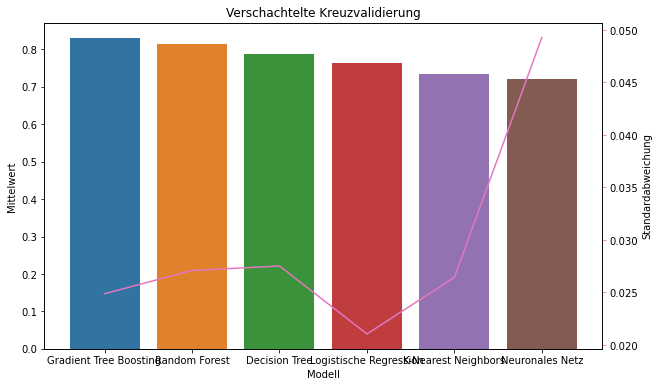

In [57]:
# Darstellung als Säulendiagramm kombiniert mit Liniendiagramm
# Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
# Bar plot creation
ax1.set_title('Verschachtelte Kreuzvalidierung')
ax1.set_xlabel('Modell')
ax1.set_ylabel('Mittelwert')
ax1 = sns.barplot(x=df_class_step_3c.index, y='Mittelwert', data=df_class_step_3c)
ax1.tick_params(axis='y')
# Specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:pink'
# Line plot creation
ax2.set_ylabel('Standardabweichung')
ax2 = sns.lineplot(x=df_class_step_3c.index, y='Standardabweichung', data=df_class_step_3c, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
# Show plot
plt.show()

#### Tabellarisches Ranking der Prognosegenauigkeit nach verschachtelter Kreuzvalidierung mit optimierten Hyperparametern - Boxplot

In [58]:
df_plot_nested_kfold_class = pd.DataFrame(
        {'Decision Tree': scores_tree_class,
         'Random Forest': scores_forest_class,
         'Logistische Regression': scores_logreg,
         'K-Nearest Neighbors': scores_knn_class,
         'Neuronales Netz' : scores_neuronales_netz_class,
         'Gradient Tree Boosting' : scores_gradient_boosting_class}
)

display(df_plot_nested_kfold_class.describe())

Decision Tree  Random Forest  Logistische Regression  \
count      10.000000      10.000000               10.000000   
mean        0.787647       0.813529                0.764706   
std         0.029010       0.028556                0.022184   
min         0.747059       0.776471                0.735294   
25%         0.767647       0.800000                0.748529   
50%         0.788235       0.805882                0.761765   
75%         0.800000       0.817647                0.776471   
max         0.841176       0.870588                0.805882   

       K-Nearest Neighbors  Neuronales Netz  Gradient Tree Boosting  
count            10.000000        10.000000               10.000000  
mean              0.735294         0.721765                0.830000  
std               0.027868         0.051955                0.026226  
min               0.694118         0.635294                0.800000  
25%               0.717647         0.691176                0.808824  
50%               0.729412         0.723529                0.823529  
75%               0.754412         0.750000                0.850000  
max               0.782353         0.800000                0.870588

#### Graphisches Ranking der Prognosegenauigkeit nach verschachtelter Kreuzvalidierung mit optimierten Hyperparametern - Boxplot

In [59]:
fig = px.box(df_plot_nested_kfold_class)
fig.update_layout(
    title='Nested Cross Validation',
    xaxis_title='Modelle',
    yaxis_title=' ',
)

In [60]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Bei der verschachtelten Kreuzvalidierung ergibt sich wieder das altbekannte Ranking mit Gradient Tree Boosting auf dem ersten und dem Random Forest auf dem zweiten Rang. Die beiden Modelle unterscheiden sich nur unwesentlich im Hinblick auf die Standardabweichung. Das Neuronale Netz belegt wieder den letzten Platz und ist durch eine überdurchschnittliche Standardabweichung gekennzeichnet.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

### b) Wählen Sie ein optimales Modell auf Basis der Prognosegenauigkeit aus.

Aus den vorausgegangenen Modellbildungsschritten lässt sich ableiten, dass sich für die vorliegende Klassifikationsaufgabe im Hinblick auf die Prognosegenauigkeit Gradient Tree Boosting oder der Random Forest am besten zu eignen scheinen, was sich der folgenden Übersicht aller Modellbildungsschritte entnehmen lässt.

In [61]:
# Aufbereitung der Ergebnisse aus der Modellbildung
df_class_step_1_summary = df_class_step_1.sort_values(by='Prognosegenauigkeit', ascending=False)
df_class_step_1_summary = df_class_step_1_summary.rename(columns={'Prognosegenauigkeit': 'Accuracy'})
df_class_step_1_summary = df_class_step_1_summary.reset_index()

# Aufbereitung der Ergebnisse aus dem einfachen Datensplit
df_class_step_2b_summary = df_class_step_2b.loc[df_class_step_2b['Data'] == 'Test']
df_class_step_2b_summary = df_class_step_2b_summary.drop(['Data'], axis=1)
df_class_step_2b_summary = df_class_step_2b_summary.sort_values(by='Prognosegenauigkeit', ascending=False)
df_class_step_2b_summary = df_class_step_2b_summary.rename(columns={'Prognosegenauigkeit': 'Accuracy'})
df_class_step_2b_summary = df_class_step_2b_summary.reset_index()

# Aufbereitung der Ergebnisse aus der K-Fold Cross Validation
df_plot_kfold_class_summary = df_plot_kfold_class.describe()
df_plot_kfold_class_summary = df_plot_kfold_class_summary.transpose()
df_plot_kfold_class_summary = df_plot_kfold_class_summary.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max'], axis=1)
df_plot_kfold_class_summary = df_plot_kfold_class_summary.sort_values(by='mean', ascending=False)
df_plot_kfold_class_summary = df_plot_kfold_class_summary.rename(columns={'mean': 'Accuracy'})
df_plot_kfold_class_summary = df_plot_kfold_class_summary.rename_axis('Modell')
df_plot_kfold_class_summary = df_plot_kfold_class_summary.reset_index()

# Aufbereitung der Ergebnisse aus der Grid Search
df_class_step_3b_summary = df_class_step_3b.drop(['Beste Accuracy', 'Beste Hyperparameter', 'Bester Estimator'], axis=1)
df_class_step_3b_summary = df_class_step_3b_summary.sort_values(by='Optimierte Accuracy', ascending=False)
df_class_step_3b_summary = df_class_step_3b_summary.rename(columns={'Optimierte Accuracy': 'Accuracy'})
df_class_step_3b_summary = df_class_step_3b_summary.reset_index()

# Aufbereitung der Ergebnisse aus der Verschachtelten Kreuzvalidierung
df_class_step_3c_summary = df_class_step_3c.drop(['Standardabweichung'], axis=1)
df_class_step_3c_summary = df_class_step_3c_summary.sort_values(by='Mittelwert', ascending=False)
df_class_step_3c_summary = df_class_step_3c_summary.rename(columns={'Mittelwert': 'Accuracy'})
df_class_step_3c_summary = df_class_step_3c_summary.reset_index()

# Darstellung der Ergebnisse in einem Dataframe
header_classification = [np.array(['Modellbildung','Modellbildung','Einfacher Datensplit','Einfacher Datensplit','K-Fold Cross Validation','K-Fold Cross Validation','Grid Search','Grid Search', 'Verschachtelte Kreuzvalidierung', 'Verschachtelte Kreuzvalidierung']), 
np.array(['Modell','Accuracy','Modell','Accuracy','Modell','Accuracy','Modell','Accuracy','Modell','Accuracy'])] 

classification_result = pd.DataFrame(columns = header_classification)
classification_result['Modellbildung', 'Modell'] = df_class_step_1_summary['Modell']
classification_result['Modellbildung', 'Accuracy'] = df_class_step_1_summary['Accuracy']
classification_result['Einfacher Datensplit', 'Modell'] = df_class_step_2b_summary['Modell']
classification_result['Einfacher Datensplit', 'Accuracy'] = df_class_step_2b_summary['Accuracy']
classification_result['K-Fold Cross Validation', 'Modell'] = df_plot_kfold_class_summary['Modell']
classification_result['K-Fold Cross Validation', 'Accuracy'] = df_plot_kfold_class_summary['Accuracy']
classification_result['Grid Search', 'Modell'] = df_class_step_3b_summary['Modell']
classification_result['Grid Search', 'Accuracy'] = df_class_step_3b_summary['Accuracy']
classification_result['Verschachtelte Kreuzvalidierung', 'Modell'] = df_class_step_3c_summary['Modell']
classification_result['Verschachtelte Kreuzvalidierung', 'Accuracy'] = df_class_step_3c_summary['Accuracy']

classification_result = classification_result.style.hide_index()
classification_result

Anhand dieser Übersicht kann nur schwer eine eindeutige Entscheidung getroffen werden, welches Modell auf den gegebenen Daten am besten performt. Daher werden die Modelle im Folgenden auf eine weitere Weise evaluiert.

Die Evaluation von Modellen kann nämlich auch von einem ganzheitlichen Standpunkt aus erfolgen. Hierfür wird die Leistung des Modells anhand einer geschäftlichen Fragestellung, hier die angestrebte Einteilung in Käufer und Nicht-Käufer, gemessen. Eine Art der Visualisierung ist die **Receiver Operating Characteristics (kurz ROC)-Curve**, die die Rate falsch positiver Klassifizierungen (FP) der Rate der richtig positiven Klassifizierungen (TP) gegenüberstellt. Im vorliegenden Kontext entsprechen die FP den Kunden, die als potenzielle Käufer identifiziert wurden, obwohl sie nicht kaufen werden und die TP die als Käufer identifizierten Kunden, die auch tatsächlich kaufen werden. Für die Leistungsbewertung wird der Raum unter der ROC-Curve (area under the curve, AUC) gemessen und somit ein Vergleich der Modelle möglich.

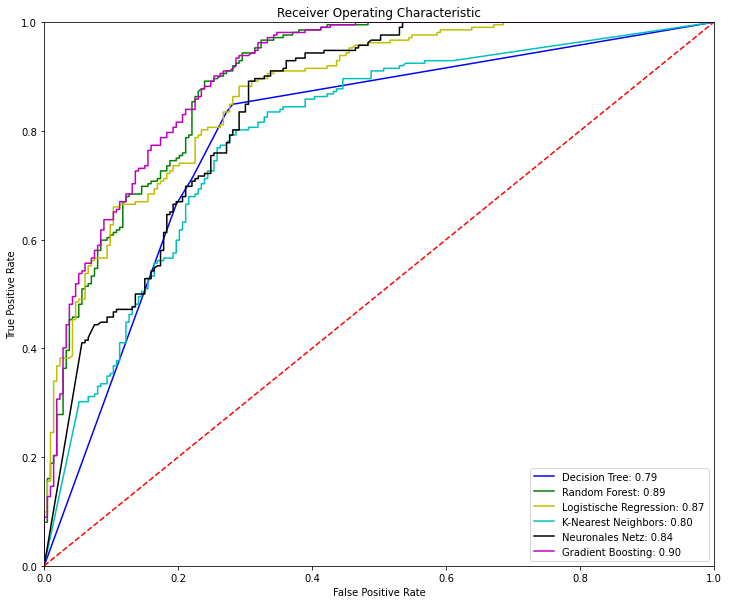

In [62]:
# Unterdrücken von Convergence Warnungen, da max-iter aus Performancegründen bewusst nicht weiter erhöht wird
simplefilter("ignore", category=ConvergenceWarning)

##### ROC-Curve

### Decision Tree

# calculate the fpr and tpr for all thresholds of the classification
nested_tree_class.fit(X_train, Y_train)
probs_tree = nested_tree_class.predict_proba(X_test)
preds_tree = probs_tree[:,1]
fpr_tree, tpr_tree, threshold = metrics.roc_curve(Y_test, preds_tree)
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)


### Random Forest

# calculate the fpr and tpr for all thresholds of the classification
nested_forest_class.fit(X_train, Y_train)
probs_forest = nested_forest_class.predict_proba(X_test)
preds_forest = probs_forest[:,1]
fpr_forest, tpr_forest, threshold = metrics.roc_curve(Y_test, preds_forest)
roc_auc_forest = metrics.auc(fpr_forest, tpr_forest)


### Logistische Regression

# calculate the fpr and tpr for all thresholds of the classification
nested_logreg.fit(X_train, Y_train)
probs_logreg = nested_logreg.predict_proba(X_test)
preds_logreg = probs_logreg[:,1]
fpr_logreg, tpr_logreg, threshold = metrics.roc_curve(Y_test, preds_logreg)
roc_auc_logreg = metrics.auc(fpr_logreg, tpr_logreg)


### K-Nearest Neighbors
# calculate the fpr and tpr for all thresholds of the classification
nested_knn_class.fit(X_train, Y_train)
probs_knn = nested_knn_class.predict_proba(X_test)
preds_knn = probs_knn[:,1]
fpr_knn, tpr_knn, threshold = metrics.roc_curve(Y_test, preds_knn)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)


### Neuronales Netz

# calculate the fpr and tpr for all thresholds of the classification
nested_neuronales_netz_class.fit(X_train, Y_train)
probs_neuronales_netz = nested_neuronales_netz_class.predict_proba(X_test)
preds_neuronales_netz = probs_neuronales_netz[:,1]
fpr_neuronales_netz, tpr_neuronales_netz, threshold = metrics.roc_curve(Y_test, preds_neuronales_netz)
roc_auc_neuronales_netz = metrics.auc(fpr_neuronales_netz, tpr_neuronales_netz)


### Gradient Boosting

# calculate the fpr and tpr for all thresholds of the classification
nested_gradient_boosting_class.fit(X_train, Y_train)
probs_gradient_boosting = nested_gradient_boosting_class.predict_proba(X_test)
preds_gradient_boosting = probs_gradient_boosting[:,1]
fpr_gradient_boosting, tpr_gradient_boosting, threshold = metrics.roc_curve(Y_test, preds_gradient_boosting)
roc_auc_gradient_boosting = metrics.auc(fpr_gradient_boosting, tpr_gradient_boosting)

# Plot ROC-curve
plt.figure(figsize=(12, 10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_tree, tpr_tree, 'b', label = 'Decision Tree: %0.2f' % roc_auc_tree)
plt.plot(fpr_forest, tpr_forest, 'g', label = 'Random Forest: %0.2f' % roc_auc_forest)
plt.plot(fpr_logreg, tpr_logreg, 'y', label = 'Logistische Regression: %0.2f' % roc_auc_logreg)
plt.plot(fpr_knn, tpr_knn, 'c', label = 'K-Nearest Neighbors: %0.2f' % roc_auc_knn)
plt.plot(fpr_neuronales_netz, tpr_neuronales_netz, 'k', label = 'Neuronales Netz: %0.2f' % roc_auc_neuronales_netz)
plt.plot(fpr_gradient_boosting, tpr_gradient_boosting, 'm', label = 'Gradient Boosting: %0.2f' % roc_auc_gradient_boosting)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [63]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Die ROC-Curve bestätigt die bisher gewonnenen Erkenntnisse in Bezug auf die am besten performenden Modelle. Auch wenn die AUC als Leistungsbemessungskennzahl sich für die beiden besten Modelle Gradient Tree Boosting (0,90) und Random Forest (0,89) kaum wesentlich unterscheidet, performt **Gradient Tree Boosting** auf dem Trainingsdatensatz besser. Wir wählen daher Gradient Tree Boosting als Klassifikationsmodell für das weitere Vorgehen aus.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

# Aufgabe 3: Entwicklung eines Regressionsmodells zur Prognose des Umsatzes der Käufer

Im Folgenden werden sechs verschiedene Regressionsmodelle gebildet und optimiert, um das Modell zu identifizieren, welches das höchste Bestimmtheitsmaß in Bezug auf den Umsatz der Käufer liefert.

Dafür werden die Regressionsmodelle Decision Tree, Random Forest, Linear Regression, K-Nearest Neighbors, Neuronales Netz und Gradient Tree Boosting auf den Testdaten trainiert und die Prognoseergebnisse gegenübergestellt.

### a) Selektieren Sie Trainings- und Validierungsdatensätze nur für die Käufer.

Da ein Umsatz nur bei der Gruppe der Käufer anfällt, werden im Folgenden zunächst die Datensätze zu Käufern extrahiert, bevor dieser gefilterte Datensatz anschließend analog zu Aufgabe 2 in Trainings- und Testdaten aufgeteilt wird.

In [64]:
df_Käufer = df.loc[df['Kauf'] == 1]

df_Käufer.head(5)

Inland  Quelle  Transaktionen  letzte Aenderung  erste Aenderung  \
ID                                                                       
108        1      12              1              2907             2907   
1371       1      13              2              1920             1942   
1920       0       4              3              2296             2564   
1539       1       3              1              3024             3024   
1987       1       4              4              1710             2982   

      Online-Bestellung  Männlich  Firmenadresse  Kauf  Umsatz  
ID                                                              
108                   0         1              1     1     160  
1371                  1         1              0     1     130  
1920                  1         0              1     1     514  
1539                  1         1              1     1     129  
1987                  0         0              0     1     145

In [65]:
##### Der Datensplit gilt für alle Regressionsmodelle gleichermaßen.
# Zuweisung von X und Y
x = df_Käufer[predictor_attributes]
y = df_Käufer['Umsatz']

# Aufteilung des Datensatzes
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

print("Der Trainingsdatensatz enthält",len(x_train), "Datensätze für x. \n")
print("Der Trainingsdatensatz enthält",len(y_train), "Datensätze für y. \n")
unique, counts = np.unique(y_train, return_counts=True)

print("Der Validierungsdatensatz enthält",len(x_test), "Datensätze für x. \n")
print("Der Validierungsdatensatz enthält",len(y_test), "Datensätze für y. \n")
unique, counts = np.unique(y_test, return_counts=True)

Der Trainingsdatensatz enthält 637 Datensätze für x. 

Der Trainingsdatensatz enthält 637 Datensätze für y. 

Der Validierungsdatensatz enthält 213 Datensätze für x. 

Der Validierungsdatensatz enthält 213 Datensätze für y. 



### b) Trainieren Sie verschiedene Modelltypen und optimieren Sie Hyper- und Eingabeparameter.

## Step 1: Modellbildung

Im folgenden Schritt werden die sechs gewählten Regressionsmodelle zunächst ohne Optimierung der Hyperparameter, aber mit Datensplit modelliert, um eine erste Einschätzung des Bestimmtheitsmaßes ($R^2$) zu erhalten.

In [66]:
# Vorbereitung & Importe
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Unterdrücken von Convergence Warnungen, da max-iter aus Performancegründen bewusst nicht weiter erhöht wird
simplefilter("ignore", category=ConvergenceWarning)

# Definition und Fitting des Algorithmus
decision_tree_reg = DecisionTreeRegressor().fit(x_train, y_train)
random_forest_reg = RandomForestRegressor().fit(x_train, y_train)
linreg = LinearRegression().fit(x_train, y_train)
knn_reg = KNeighborsRegressor(n_neighbors = 5).fit(x_train, y_train)
neuronales_netz_reg = MLPRegressor(random_state=1, max_iter=1000).fit(x_train, y_train)
gradient_boosting_reg = GradientBoostingRegressor().fit(x_train, y_train)

# Predictions
y_pred_tree = decision_tree_reg.predict(x_test)
y_pred_forest = random_forest_reg.predict(x_test)
y_pred_linreg = linreg.predict(x_test)
y_pred_knn = knn_reg.predict(x_test)
y_pred_neuronales_netz = neuronales_netz_reg.predict(x_test)
y_pred_gradient_boosting = gradient_boosting_reg.predict(x_test)

df_pred = pd.DataFrame({'Actual': y_test, 
                        'Decision Tree Predictions': y_pred_tree,
                        'Random Forest Predictions': y_pred_forest,
                        'Linear Regression Predictions': y_pred_linreg,
                        'KNN Predictions': y_pred_knn,
                        'Neuronales Netz Predictions': y_pred_neuronales_netz,
                        'Gradient Tree Boosting Predictions': y_pred_gradient_boosting})

display(df_pred)

##### Decision Tree

# Bestimmtheitsmaß Decision Tree Regression

print("Decision Tree:\n")

print('Mean Absolute Error:\t\t', metrics.mean_absolute_error(y_test, y_pred_tree))  
print('Mean Squared Error:\t\t', metrics.mean_squared_error(y_test, y_pred_tree))  
print('Root Mean Squared Error:\t', np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree)))


print('R^2 score (Training):\t\t {:.3f}'
     .format(decision_tree_reg.score(x_train, y_train)))
print('R^2 score (Test):\t\t {:.3f}'
     .format(decision_tree_reg.score(x_test, y_test)))


##### Random Forest

# Bestimmtheitsmaß Random Forest Regression

print("\n\nRandom Forest:\n")

print('Mean Absolute Error:\t\t', metrics.mean_absolute_error(y_test, y_pred_forest))  
print('Mean Squared Error:\t\t', metrics.mean_squared_error(y_test, y_pred_forest))  
print('Root Mean Squared Error:\t', np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest)))


print('R^2 score (Training):\t\t {:.3f}'
     .format(random_forest_reg.score(x_train, y_train)))
print('R^2 score (Test):\t\t {:.3f}'
     .format(random_forest_reg.score(x_test, y_test)))


##### Linear Regression

# Bestimmtheitsmaß Linear Regression
print("\n\nLinear Regression:\n")

print('Mean Absolute Error:\t\t', metrics.mean_absolute_error(y_test, y_pred_linreg))  
print('Mean Squared Error:\t\t', metrics.mean_squared_error(y_test, y_pred_linreg))  
print('Root Mean Squared Error:\t', np.sqrt(metrics.mean_squared_error(y_test, y_pred_linreg)))

print('R^2 score (Training):\t\t {:.3f}'
     .format(linreg.score(x_train, y_train)))
print('R^2 score (Test):\t\t {:.3f}'
     .format(linreg.score(x_test, y_test)))


##### K-Nearest Neighbors

# Bestimmtheitsmaß K-Nearest Neighbors Regression
print("\n\nK-Nearest Neighbors:\n")

print('Mean Absolute Error:\t\t', metrics.mean_absolute_error(y_test, y_pred_knn))  
print('Mean Squared Error:\t\t', metrics.mean_squared_error(y_test, y_pred_knn))  
print('Root Mean Squared Error:\t', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))

print('R^2 score (Training):\t\t {:.3f}'
     .format(knn_reg.score(x_train, y_train)))
print('R^2 score (Test):\t\t {:.3f}'
     .format(knn_reg.score(x_test, y_test)))


##### Neuronales Netz

# Bestimmtheitsmaß Neuronales Netz Regression

print("\n\nNeuronales Netz:\n")

print('Mean Absolute Error:\t\t', metrics.mean_absolute_error(y_test, y_pred_neuronales_netz))  
print('Mean Squared Error:\t\t', metrics.mean_squared_error(y_test, y_pred_neuronales_netz))  
print('Root Mean Squared Error:\t', np.sqrt(metrics.mean_squared_error(y_test, y_pred_neuronales_netz)))


print('R^2 score (Training):\t\t {:.3f}'
     .format(neuronales_netz_reg.score(x_train, y_train)))
print('R^2 score (Test):\t\t {:.3f}'
     .format(neuronales_netz_reg.score(x_test, y_test)))


##### Gradient Boosting

# Bestimmtheitsmaß Gradient Boosting Regression

print("\n\nGradient Tree Boosting:\n")

print('Mean Absolute Error:\t\t', metrics.mean_absolute_error(y_test, y_pred_gradient_boosting))  
print('Mean Squared Error:\t\t', metrics.mean_squared_error(y_test, y_pred_gradient_boosting))  
print('Root Mean Squared Error:\t', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gradient_boosting)))


print('R^2 score (Training):\t\t {:.3f}'
     .format(gradient_boosting_reg.score(x_train, y_train)))
print('R^2 score (Test):\t\t {:.3f}'
     .format(gradient_boosting_reg.score(x_test, y_test)))

Actual  Decision Tree Predictions  Random Forest Predictions  \
ID                                                                   
456      163                       65.0                  85.620000   
133      129                      184.0                 125.550000   
602      159                      279.0                 188.193333   
979       33                      140.0                 200.930000   
389        6                      130.0                  76.520000   
...      ...                        ...                        ...   
716      260                      139.0                 193.930000   
240       54                      185.0                 225.830000   
467      184                      184.0                 133.915000   
867      128                      219.0                 183.520000   
1608      85                      130.0                 130.310000   

      Linear Regression Predictions  KNN Predictions  \
ID                                                     
456                      132.820422            146.6   
133                       16.218565            122.2   
602                       88.291871            146.4   
979                      119.558811            110.2   
389                       17.983648             84.2   
...                             ...              ...   
716                      128.444962            355.0   
240                      200.388675            100.0   
467                        7.060374            112.4   
867                      196.900378            136.0   
1608                     106.856542            163.0   

      Neuronales Netz Predictions  Gradient Tree Boosting Predictions  
ID                                                                     
456                     90.523227                          110.754505  
133                    102.555237                          116.874775  
602                    112.053542                          134.879183  
979                    170.571350                          170.754462  
389                    117.524158                           95.367445  
...                           ...                                 ...  
716                    343.727713                          195.488683  
240                    188.316696                          159.775164  
467                    100.323765                          132.679638  
867                    182.202278                          212.677856  
1608                   147.401794                          141.323826  

[213 rows x 7 columns]

Decision Tree:

Mean Absolute Error:		 143.92018779342723
Mean Squared Error:		 56875.15962441314
Root Mean Squared Error:	 238.48513501770535
R^2 score (Training):		 0.999
R^2 score (Test):		 -0.078


Random Forest:

Mean Absolute Error:		 109.14887480438185
Mean Squared Error:		 39359.1017375133
Root Mean Squared Error:	 198.39128442931485
R^2 score (Training):		 0.931
R^2 score (Test):		 0.254


Linear Regression:

Mean Absolute Error:		 114.51126846753162
Mean Squared Error:		 39151.515552475415
Root Mean Squared Error:	 197.86741912825218
R^2 score (Training):		 0.497
R^2 score (Test):		 0.258


K-Nearest Neighbors:

Mean Absolute Error:		 131.4629107981221
Mean Squared Error:		 50993.817464788735
Root Mean Squared Error:	 225.81810703481847
R^2 score (Training):		 0.413
R^2 score (Test):		 0.033


Neuronales Netz:

Mean Absolute Error:		 123.32684072885546
Mean Squared Error:		 46991.46465185949
Root Mean Squared Error:	 216.7751476804006
R^2 score (Training):		 0.285
R^2 score (

#### Tabellarisches Ranking des Bestimmtheitsmaßes ohne Hyperparameter Optimierung

In [67]:
decision_tree = [ ('Decision Tree', decision_tree_reg.score(x_test, y_test), 'Test')]
#Create a DataFrame object
df_reg_step_1 = pd.DataFrame(decision_tree, columns = ['Modell' , 'Bestimmtheitsmaß', 'Data'])
#Add new ROW
df_reg_step_1.loc[1]=[ 'Decision Tree', decision_tree_reg.score(x_train, y_train), 'Training']
df_reg_step_1.loc[2]=[ 'Random Forest', random_forest_reg.score(x_test, y_test), 'Test']
df_reg_step_1.loc[3]=[ 'Random Forest', random_forest_reg.score(x_train, y_train), 'Training']
df_reg_step_1.loc[4]=[ 'Linear Regression', linreg.score(x_test, y_test), 'Test']
df_reg_step_1.loc[5]=[ 'Linear Regression', linreg.score(x_train, y_train), 'Training']
df_reg_step_1.loc[6]=[ 'K-Nearest Neighbors', knn_reg.score(x_test, y_test), 'Test']
df_reg_step_1.loc[7]=[ 'K-Nearest Neighbors', knn_reg.score(x_train, y_train), 'Training']
df_reg_step_1.loc[8]=[ 'Neuronales Netz', neuronales_netz_reg.score(x_test, y_test), 'Test']
df_reg_step_1.loc[9]=[ 'Neuronales Netz', neuronales_netz_reg.score(x_train, y_train), 'Training']
df_reg_step_1.loc[10]=[ 'Gradient Tree Boosting', gradient_boosting_reg.score(x_test, y_test), 'Test']
df_reg_step_1.loc[11]=[ 'Gradient Tree Boosting', gradient_boosting_reg.score(x_train, y_train), 'Training']

# Setze Spalte 'Modell' als Index
df_reg_step_1.set_index('Modell', inplace=True, drop=True)
# Absteigend sortieren
df_reg_step_1.sort_values(by='Bestimmtheitsmaß', ascending=False, inplace=True)

df_reg_step_1

Bestimmtheitsmaß      Data
Modell                                            
Decision Tree                   0.999246  Training
Random Forest                   0.930649  Training
Gradient Tree Boosting          0.840628  Training
Linear Regression               0.497446  Training
K-Nearest Neighbors             0.413066  Training
Neuronales Netz                 0.285273  Training
Linear Regression               0.257746      Test
Random Forest                   0.253810      Test
Gradient Tree Boosting          0.240376      Test
Neuronales Netz                 0.109112      Test
K-Nearest Neighbors             0.033233      Test
Decision Tree                  -0.078268      Test

#### Graphisches Ranking des Bestimmtheitsmaßes ohne Hyperparameter Optimierung

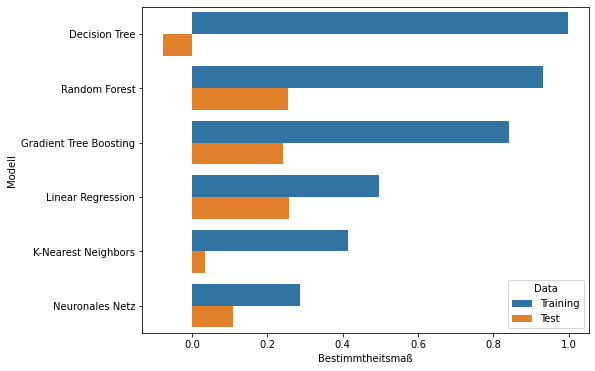

In [68]:
# Darstellung als Säulendiagramm
plt.figure(figsize=(8, 6))
bar_reg_1 = sns.barplot(y=df_reg_step_1.index, x='Bestimmtheitsmaß', hue='Data', data=df_reg_step_1, orient='h')

In [69]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Im Hinblick auf das Bestimmtheitsmaß $R^2$ schneiden die lineare Regression und der Random Forest im vorliegenden Fall auf den Testdaten am besten ab. Grundsätzlich zeigt sich jedoch, dass die Werte von $R^2$ bei allen Modellen auf den Testdaten weit vom Optimum (1) entfernt sind. Es kann die Vermutung aufgestellt werden, dass die Größe des Trainingsdatensatzes hierbei eine Rolle spielt, da zur Regressionsmodellbildung ja sogar nur ein Teil des ursprünglichen Trainingsdatensatzes (mit Kauf = 1) genutzt werden kann. Das hat einen großen Einfluss auf die Performance der Modelle, was sich besonders beim Decision Tree zeigt. Das Bestimmtheitsmaß ist hier sogar negativ, was bedeutet, dass ein zufälliges Modell den Umsatz besser prognostizieren könnte. Die weiteren Schritte zur Modellbildung verfolgen daher das Ziel, die Performance aller Modelle deutlich zu steigern.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

## Step 2: Modell Training und Evaluation

Analog zu Aufgabe 2 wird die Modellbildung im Folgenden um die Kreuzvalidierung erweitert. Die Intention hinter diesem Vorgehen ist wieder die Vermeidung von sog. Data Leaks, die auftreten, wenn die Trainings- und Evaluationsdaten im Rahmen der Modellbildung nicht strikt getrennt werden. Die Kreuzvalidierung und im weiteren Verlauf auch die verschachtelte Kreuzvalidierung sind zwei geläufige Methoden, um die Modelle robuster und zuverlässiger zu gestalten.

### K-Fold Cross Validation

In [70]:
cv_kfold = KFold(n_splits = 10, shuffle = True, random_state = 42)

##### Decision Tree

# Decision Tree Regression
decision_tree_reg = DecisionTreeRegressor(random_state=1)

# Bestimmtheitsmaß
score_tree_reg_kfold = cross_val_score(decision_tree_reg, x, y, cv = cv_kfold, scoring='r2')

# Cross Validierungsscores für Decision Tree
#print("Cross Validierungsscores für Decision Tree Regression:\n")
#print("R^2 scores:", score_tree_reg_kfold)
#print("Mittelwert:\t\t%.3f" % score_tree_reg_kfold.mean())
#print("Standardabweichung:\t%.3f" % score_tree_reg_kfold.std(),"\n")


##### Random Forest

# Random Forest Regression
random_forest_reg = RandomForestRegressor(random_state=1)

# Bestimmtheitsmaß
score_forest_reg_kfold = cross_val_score(random_forest_reg, x, y, cv = cv_kfold, scoring='r2')

# Cross Validierungsscores für Random Forest
#print("\n\nCross Validierungsscores für Random Forest Regression:\n")
#print("R^2 scores:", score_forest_reg_kfold)
#print("Mittelwert:\t\t%.3f" % score_forest_reg_kfold.mean())
#print("Standardabweichung:\t%.3f" % score_forest_reg_kfold.std(),"\n")


##### Linear Regression

# Linear Regression
linreg = LinearRegression()

# Bestimmtheitsmaß
score_linreg_kfold = cross_val_score(linreg, x, y, cv = cv_kfold, scoring='r2')

# Cross Validierungsscores für Linear Regression
#print("\n\nCross Validierungsscores für Linear Regression:\n")
#print("R^2 scores:", score_linreg_kfold)
#print("Mittelwert:\t\t%.3f" % score_linreg_kfold.mean())
#print("Standardabweichung:\t%.3f" % score_linreg_kfold.std(),"\n")


##### K-Nearest Neighbors

# K-Nearest Neighbors
knn_reg = KNeighborsRegressor(n_neighbors = 5)

# Bestimmtheitsmaß
score_knn_reg_kfold = cross_val_score(knn_reg, x, y, cv = cv_kfold, scoring='r2')

# Cross Validierungsscores für K-Nearest Neighbors Regression
#print("\n\nCross Validierungsscores für K-Nearest Neighbors Regression:\n")
#print("R^2 scores:", score_knn_reg_kfold)
#print("Mittelwert:\t\t%.3f" % score_knn_reg_kfold.mean())
#print("Standardabweichung:\t%.3f" % score_knn_reg_kfold.std(),"\n")

##### Neuronales Netz

# Neuronales Netz Regression
neuronales_netz_reg = MLPRegressor(random_state=1, max_iter=1000)

# Bestimmtheitsmaß
score_neuronales_netz_reg_kfold = cross_val_score(neuronales_netz_reg, x, y, cv = cv_kfold, scoring='r2')

# Cross Validierungsscores für Neuronales Netz
#print("\n\nCross Validierungsscores für Neuronales Netz Regression:\n")
#print("R^2 scores:", score_neuronales_netz_reg_kfold)
#print("Mittelwert:\t\t%.3f" % score_neuronales_netz_reg_kfold.mean())
#print("Standardabweichung:\t%.3f" % score_neuronales_netz_reg_kfold.std(),"\n")

# Gradient Tree Boosting Regression

gradient_boosting_reg = GradientBoostingRegressor()

# Bestimmtheitsmaß
score_gradient_boosting_reg_kfold = cross_val_score(gradient_boosting_reg, x, y, cv = cv_kfold, scoring='r2')

# Cross Validierungsscores für Gradient Boosting
#print("\n\nCross Validierungsscores für Gradient Tree Boosting Regression:\n")
#print("R^2 scores:", score_gradient_boosting_reg_kfold)
#print("Mittelwert:\t\t%.3f" % score_gradient_boosting_reg_kfold.mean())
#print("Standardabweichung:\t%.3f" % score_gradient_boosting_reg_kfold.std(),"\n")

#### Tabellarisches Ranking des Bestimmtheitsmaßes nach K-Fold Cross Validation ohne Hyperparameter Optimierung

In [71]:
df_plot_kfold_reg = pd.DataFrame(
        {'Decision Tree': score_tree_reg_kfold,
         'Random Forest': score_forest_reg_kfold,
         'Linear Regression': score_linreg_kfold,
         'K-Nearest Neighbors': score_knn_reg_kfold,
         'Neuronales Netz': score_neuronales_netz_reg_kfold,
         'Gradient Tree Boosting': score_gradient_boosting_reg_kfold}
)

display(df_plot_kfold_reg.describe())

Decision Tree  Random Forest  Linear Regression  K-Nearest Neighbors  \
count      10.000000      10.000000          10.000000            10.000000   
mean       -0.542690       0.355034           0.418423             0.031434   
std         1.566511       0.357815           0.163706             0.123943   
min        -4.916303      -0.500465           0.107801            -0.217385   
25%        -0.283103       0.226964           0.308252            -0.016754   
50%         0.028189       0.451798           0.454010             0.090924   
75%         0.170761       0.603832           0.563490             0.109266   
max         0.231895       0.651217           0.584072             0.141753   

       Neuronales Netz  Gradient Tree Boosting  
count        10.000000               10.000000  
mean          0.302996                0.429361  
std           0.161461                0.194664  
min           0.053908                0.103091  
25%           0.160848                0.280525  
50%           0.344975                0.465762  
75%           0.420305                0.612061  
max           0.510729                0.638526

#### Graphisches Ranking des Bestimmtheitsmaßes nach K-Fold Cross Validation ohne Hyperparameter Optimierung

In [72]:
fig = px.box(df_plot_kfold_reg)
fig.update_layout(
    title='K-Fold Cross Validation',
    xaxis_title='Modelle',
    yaxis_title=' ',
)

In [73]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Bei der Kreuzvalidierung ergibt sich für alle Modelle ein Median > 0. Nichtsdestotrotz gibt es beim Decision Tree, beim Random Forest und bei K-Nearest Neighbors Ausreißer in den negativen Bereich. Am besten performt Gradient Tree Boosting mit einem mittleren Bestimmtheitsmaß von ca. 0,43, was eine deutliche Verbesserung im Vergleich zum einfachen Datensplit bedeutet.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

## Step 3: Modell Optimierung

### a) Identifikation der jeweiligen Hyperparameter der verschiedenen Regressionsmodelle

Bevor analog zu Aufgabe 2 eine Grid Search für die verschiedenen Regressionsmodelle durchgeführt wird, um nach optimalen Parametern zu suchen, werden im Folgenden zunächst die standardmäßigen Hyperparameter in sklearn identifiziert.

#### Decision Tree Regression


In [74]:
# Der nachfolgende Output zeigt die Default Hyperparameter, die in sklearn verwendet werden

estimator_tree_reg=DecisionTreeRegressor()
estimator_tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

#### Random Forest Regression

In [75]:
# Der nachfolgende Output zeigt die Default Hyperparameter, die in sklearn verwendet werden

estimator_random_forest_reg=RandomForestRegressor()
estimator_random_forest_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Linear Regression

In [76]:
# Der nachfolgende Output zeigt die Default Hyperparameter, die in sklearn verwendet werden

estimator_linreg=LinearRegression()
estimator_linreg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

#### K-Nearest Neighbors Regression

In [77]:
estimator_knn_reg=KNeighborsRegressor(n_neighbors = 5)
estimator_knn_reg.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

#### Neuronales Netz Regression

In [78]:
estimator_neuronales_netz_reg= MLPRegressor()
estimator_neuronales_netz_reg.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

#### Gradient Boosting Regression

In [79]:
estimator_gradient_boosting_reg= GradientBoostingRegressor()
estimator_gradient_boosting_reg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### b) Grid Search zur Optimierung ausgewählter Hyperparameter

Auch für die Regressionsmodelle wird im Folgenden eine Grid Search durchgeführt, um so aus einer zuvor auf einer trial-and-error-basierten Vorgehensweise identifizierten Bandbreite von Hyperparameter-Ausprägungen die optimale Kombination zu finden.

In [80]:
# Unterdrücken von Convergence Warnungen, da max-iter aus Performancegründen bewusst nicht weiter erhöht wird
simplefilter("ignore", category=ConvergenceWarning)

##### Decision Tree

# Definition des Modells und der Hyperparameter
estimator_tree_reg = DecisionTreeRegressor(random_state=1)
range_max_depth = np.arange(start=1, stop=10, step=1, dtype=int)
range_min_samples_split = np.arange(start=1, stop=20, step=2, dtype=int)
range_min_samples_leaf = np.arange(start=8, stop=20, step=2, dtype=int)

# Definition der Grid Search
grid_tree_reg = dict(max_depth=range_max_depth, min_samples_split=range_min_samples_split,
                     min_samples_leaf=range_min_samples_leaf)

cv_rs_kfold = KFold(n_splits=10)
grid_search_tree_reg = GridSearchCV(estimator=estimator_tree_reg, param_grid=grid_tree_reg, n_jobs=-1, cv=cv_rs_kfold, scoring='r2',error_score=0)
grid_result_tree_reg = grid_search_tree_reg.fit(x_train, y_train)

#print("\nErgebnisse der Hyperparameter Suche auf den Trainingsdaten für Decision Tree\n")
#print("Beste R^2 score:\t %.3f" % grid_search_tree_reg.best_score_)
#print("Beste Hyperparameter:\t %s" % grid_search_tree_reg.best_params_)
#print("Bester Estimator:\t %s" % grid_search_tree_reg.best_estimator_)

best_tree_reg = grid_search_tree_reg.best_estimator_
best_tree_reg.fit(x_train, y_train)
#print("\nR^2 score auf Validierungsdaten mit Hyperparameter Optimierung für Decision Tree Regression:\t %.3f" % best_tree_reg.score(x_test, y_test))


##### Random Forest

# Definition des Modells und der Hyperparameter
estimator_random_forest_reg = RandomForestRegressor(random_state=1)

# Definition der Grid Search
grid_random_forest_reg = dict(n_estimators=[50, 100, 150], max_depth=[5, 10, 15],
                             min_samples_split=[3, 5, 10], min_samples_leaf=[1, 2, 4])

cv_rs_kfold = KFold(n_splits=10)
grid_search_random_forest_reg = GridSearchCV(estimator=estimator_random_forest_reg, param_grid=grid_random_forest_reg, n_jobs=-1, cv=cv_rs_kfold, scoring='r2',error_score=0)
grid_result_random_forest_reg = grid_search_random_forest_reg.fit(x_train, y_train)

#print("\n\n\nErgebnisse der Hyperparameter Suche auf den Trainingsdaten für Random Forest\n")
#print("Beste R^2 score:\t %.3f" % grid_search_random_forest_reg.best_score_)
#print("Beste Hyperparameter:\t %s" % grid_search_random_forest_reg.best_params_)
#print("Bester Estimator:\t %s" % grid_search_random_forest_reg.best_estimator_)

best_random_forest_reg = grid_search_random_forest_reg.best_estimator_
best_random_forest_reg.fit(x_train, y_train)
#print("\nR^2 score auf Validierungsdaten mit Hyperparameter Optimierung für Random Forest Regression:\t %.3f" % best_random_forest_reg.score(x_test, y_test))


##### Linear Regression

# Definition des Modells und der Hyperparameter
estimator_linreg = LinearRegression()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

# Pipeline mit Scaler und Klassifizierer 
pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(metric='euclidean'))])

# Definition der Grid Search
grid_linreg = [ 
    {'copy_X': [True, False],
     'fit_intercept': [True, False],
     'n_jobs': [None, 1, -1, -2],
     'normalize': [True, False]}
]
cv_rs_kfold = KFold(n_splits=10)
grid_search_linreg = GridSearchCV(estimator=estimator_linreg, param_grid=grid_linreg, n_jobs=-1, cv=cv_rs_kfold, scoring='r2',error_score=0)
grid_result_linreg = grid_search_linreg.fit(x_train, y_train)

#print("\n\n\nErgebnisse der Hyperparameter Suche auf den Trainingsdaten für Linear Regression\n")
#print("Beste R^2 score:\t %.3f" % grid_search_linreg.best_score_)
#print("Beste Hyperparameter:\t %s" % grid_search_linreg.best_params_)
#print("Bester Estimator:\t %s" % grid_search_linreg.best_estimator_)

best_linreg = grid_search_linreg.best_estimator_
best_linreg.fit(x_train, y_train)
#print("\nR^2 score auf Validierungsdaten mit Hyperparameter Optimierung für Linear Regression:\t\t %.3f" % best_linreg.score(x_test, y_test))


##### K-Nearest Neighbors

# Definition des Modells und der Hyperparameter
estimator_knn_reg = KNeighborsRegressor()
n = 10
range_k = np.arange(start=1, stop=(len(x_train)-1)*((n-1)/n), step=1, dtype=int) #Alle Möglichen k-Werte angeben in der Range von 1 bis n*9/10 da n=10 

# Pipeline mit Scaler und Klassifizierer 
pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(metric='euclidean'))])

# Definition der Grid Search
grid_knn_reg = [ 
    {'n_neighbors': range_k,
    'weights': ['uniform', 'distance']}
]
cv_rs_kfold = KFold(n_splits=10)
grid_search_knn_reg = GridSearchCV(estimator=estimator_knn_reg, param_grid=grid_knn_reg, n_jobs=-1, cv=cv_rs_kfold, scoring='r2',error_score=0)
grid_result_knn_reg = grid_search_knn_reg.fit(x_train, y_train)

#print("\n\n\nErgebnisse der Hyperparameter Suche auf den Trainingsdaten für K-Nearest Neighbors\n")
#print("Beste R^2 score:\t %.3f" % grid_search_knn_reg.best_score_)
#print("Beste Hyperparameter:\t %s" % grid_search_knn_reg.best_params_)
#print("Bester Estimator:\t %s" % grid_search_knn_reg.best_estimator_)

best_knn_reg = grid_search_knn_reg.best_estimator_
best_knn_reg.fit(x_train, y_train)
#print("\nR^2 score auf Validierungsdaten mit Hyperparameter Optimierung für K-Nearest Neighbors Regression: %.3f" % best_knn_reg.score(x_test, y_test))

##### Neuronales Netz

# Definition des Modells und der Hyperparameter
estimator_neuronales_netz_reg= MLPRegressor()

# Definition der Grid Search
grid_neuronales_netz_reg = [ 
     {'hidden_layer_sizes': [(8,)],
     'activation': ['identity'],
    'solver': ['lbfgs'],
    'max_iter': [200],
    'random_state': [1]}
]

cv_rs_kfold = KFold(n_splits=10)
grid_search_neuronales_netz_reg = GridSearchCV(estimator=estimator_neuronales_netz_reg, param_grid=grid_neuronales_netz_reg, n_jobs=-1, cv=cv_rs_kfold, scoring='r2',error_score=0)
grid_result_neuronales_netz_reg = grid_search_neuronales_netz_reg.fit(x_train, y_train)

#print("\n\n\nErgebnisse der Hyperparameter Suche auf den Trainingsdaten für Neuronales Netz\n")
#print("Beste R^2 score:\t %.3f" % grid_search_neuronales_netz_reg.best_score_)
#print("Beste Hyperparameter:\t %s" % grid_search_neuronales_netz_reg.best_params_)
#print("Bester Estimator:\t %s" % grid_search_neuronales_netz_reg.best_estimator_)

best_neuronales_netz_reg = grid_search_neuronales_netz_reg.best_estimator_
best_neuronales_netz_reg.fit(x_train, y_train)
#print("\nR^2 score auf Validierungsdaten mit Hyperparameter Optimierung für Neuronales Netz Regression:\t %.3f" % best_neuronales_netz_reg.score(x_test, y_test))

##### Gradient Boosting

# Definition des Modells und der Hyperparameter
estimator_gradient_boosting_reg= GradientBoostingRegressor()

# Definition der Grid Search
grid_gradient_boosting_reg = [ 
     {'max_depth': [2],
     'min_samples_split':[8], 
     'min_samples_leaf':[1],
     'learning_rate':[0.005],
     'n_estimators':[1250],
     'max_features':[None],
     'subsample':[1.0],
     'random_state': [3]}
]

cv_rs_kfold = KFold(n_splits=10)
grid_search_gradient_boosting_reg = GridSearchCV(estimator=estimator_gradient_boosting_reg, param_grid=grid_gradient_boosting_reg, n_jobs=-1, cv=cv_rs_kfold, scoring='r2',error_score=0)
grid_result_gradient_boosting_reg = grid_search_gradient_boosting_reg.fit(x_train, y_train)

#print("\n\n\nErgebnisse der Hyperparameter Suche auf den Trainingsdaten für Gradient Boosting\n")
#print("Beste R^2 score:\t %.3f" % grid_search_gradient_boosting_reg.best_score_)
#print("Beste Hyperparameter:\t %s" % grid_search_gradient_boosting_reg.best_params_)
#print("Bester Estimator:\t %s" % grid_search_gradient_boosting_reg.best_estimator_)

best_gradient_boosting_reg = grid_search_gradient_boosting_reg.best_estimator_
best_gradient_boosting_reg.fit(x_train, y_train)
#print("\nR^2 score auf Validierungsdaten mit Hyperparameter Optimierung für Gradient Boosting Regression:\t %.3f" % best_gradient_boosting_reg.score(x_test, y_test))
print(' ')

#### Tabellarisches Ranking des Bestimmtheitsmaßes nach Hyperparameter Optimierung

In [81]:
decision_tree = [ ('Decision Tree', grid_search_tree_reg.best_score_, grid_search_tree_reg.best_params_, grid_search_tree_reg.best_estimator_, best_tree_reg.score(x_test, y_test))]
#Create a DataFrame object
df_reg_step_3b = pd.DataFrame(decision_tree, columns = ['Modell' , 'Bestes $R^2$', 'Beste Hyperparameter', 'Bester Estimator', '$R^2$ auf Validierungsdaten mit Hyperparameter Optimierung'])
#Add new ROW
df_reg_step_3b.loc[1]=[ 'Random Forest', grid_search_random_forest_reg.best_score_, grid_search_random_forest_reg.best_params_, grid_search_random_forest_reg.best_estimator_, best_random_forest_reg.score(x_test, y_test)]
df_reg_step_3b.loc[2]=[ 'Lineare Regression', grid_search_linreg.best_score_, grid_search_linreg.best_params_, grid_search_linreg.best_estimator_, best_linreg.score(x_test, y_test)]
df_reg_step_3b.loc[3]=[ 'K-Nearest Neighbors', grid_search_knn_reg.best_score_, grid_search_knn_reg.best_params_, grid_search_knn_reg.best_estimator_, best_knn_reg.score(x_test, y_test)]
df_reg_step_3b.loc[4]=[ 'Neuronales Netz', grid_search_neuronales_netz_reg.best_score_, grid_search_neuronales_netz_reg.best_params_, grid_search_neuronales_netz_reg.best_estimator_, best_neuronales_netz_reg.score(x_test, y_test)]
df_reg_step_3b.loc[5]=[ 'Gradient Tree Boosting', grid_search_gradient_boosting_reg.best_score_, grid_search_gradient_boosting_reg.best_params_, grid_search_gradient_boosting_reg.best_estimator_, best_gradient_boosting_reg.score(x_test, y_test)]

# Setze Spalte 'Modell' als Index
df_reg_step_3b.set_index('Modell', inplace=True, drop=True)
# Absteigend sortieren
df_reg_step_3b.sort_values(by='$R^2$ auf Validierungsdaten mit Hyperparameter Optimierung', ascending=False, inplace=True)

df_reg_step_3b

Bestes $R^2$  \
Modell                                 
Gradient Tree Boosting      0.537983   
Neuronales Netz             0.453706   
Lineare Regression          0.452125   
Random Forest               0.491210   
Decision Tree               0.439986   
K-Nearest Neighbors         0.251804   

                                                     Beste Hyperparameter  \
Modell                                                                      
Gradient Tree Boosting  {'learning_rate': 0.005, 'max_depth': 2, 'max_...   
Neuronales Netz         {'activation': 'identity', 'hidden_layer_sizes...   
Lineare Regression      {'copy_X': True, 'fit_intercept': False, 'n_jo...   
Random Forest           {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...   
Decision Tree           {'max_depth': 5, 'min_samples_leaf': 16, 'min_...   
K-Nearest Neighbors             {'n_neighbors': 68, 'weights': 'uniform'}   

                                                         Bester Estimator  \
Modell                                                                      
Gradient Tree Boosting  ([DecisionTreeRegressor(criterion='friedman_ms...   
Neuronales Netz         MLPRegressor(activation='identity', hidden_lay...   
Lineare Regression      LinearRegression(fit_intercept=False, normaliz...   
Random Forest           (DecisionTreeRegressor(max_depth=5, max_featur...   
Decision Tree           DecisionTreeRegressor(max_depth=5, min_samples...   
K-Nearest Neighbors                   KNeighborsRegressor(n_neighbors=68)   

                        $R^2$ auf Validierungsdaten mit Hyperparameter Optimierung  
Modell                                                                              
Gradient Tree Boosting                                           0.270946           
Neuronales Netz                                                  0.262203           
Lineare Regression                                               0.259719           
Random Forest                                                    0.249792           
Decision Tree                                                    0.080561           
K-Nearest Neighbors                                              0.080092

#### Graphisches Ranking des Bestimmtheitsmaßes nach Hyperparameter Optimierung

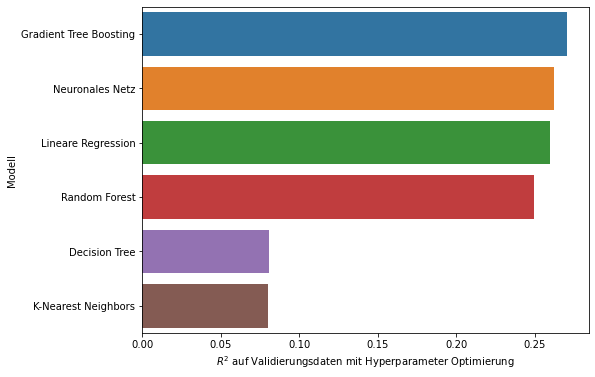

In [82]:
# Darstellung als Säulendiagramm
plt.figure(figsize=(8, 6))
bar_reg_2 = sns.barplot(y=df_reg_step_3b.index, x='$R^2$ auf Validierungsdaten mit Hyperparameter Optimierung', data=df_reg_step_3b, orient='h')

In [83]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Wie in Aufgabe 2 performt Gradient Tree Boosting bei der Grid Search am besten, auch wenn die Performance-Unterschiede zum Neuronalen Netz, der linearen Regression und dem Random Forest relativ gering sind. Der Decision Tree und K-nearest Neighbors hingegen weisen hier eine deutliche Under-Performance auf. Grundsätzlich ist eine allgemeine Performance-Steigerung im Vergleich zum einfachen Datensplit erkennbar, wenngleich diese Steigerung auch nur marginal ist. Ob eine weitere Steigerung des Bestimmtheitsmaßes mit den vorliegenden Daten möglich ist, soll sich im letzten Schritt der Modellbildung zeigen.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

### c) Verschachtelte Kreuzvalidierung

Als letzte Erweiterung der Modellbildung erfolgt nun eine verschachtelte Kreuzvalidierung analog zu Aufgabe 2. Das Ziel ist eine deutliche Steigerung des Bestimmtheitsmaßes für alle Modelle.

In [84]:
# Unterdrücken von Convergence Warnungen, da max-iter aus Performancegründen bewusst nicht weiter erhöht wird
simplefilter("ignore", category=ConvergenceWarning)

# Definieren der inneren und äußeren Validierungsschleife
inner_cv = KFold(n_splits=10)
outer_cv = KFold(n_splits=10)


##### Decision Tree

# Definition des Modells und der Hyperparameter
estimator_tree_reg = DecisionTreeRegressor(random_state=1)

# Definition der Grid Search
grid_tree_reg = [
    {'max_depth': [3, 4, 5]},
    {'min_samples_split' : [12, 13, 14]},
    {'min_samples_leaf': [15, 16, 17]}
]

nested_tree_reg = GridSearchCV(estimator=estimator_tree_reg, param_grid=grid_tree_reg, n_jobs=-1, cv=inner_cv, scoring='r2',error_score=0)
scores_tree_reg =  cross_val_score(nested_tree_reg, x, y, cv=outer_cv)

#print("\nR^2 score of Decision Tree: ")
#print("Mittelwert:\t\t %.3f" % scores_tree_reg.mean())
#print("Standardabweichung:\t %.3f" % scores_tree_reg.std())


##### Random Forest
# Definition des Modells und der Hyperparameter
estimator_forest_reg = RandomForestRegressor(random_state=1)

# Definition der verschachtelten Kreuzvalidierung
grid_random_forest_reg = dict(n_estimators=[150], max_depth=[5], min_samples_split=[5], min_samples_leaf=[1])

nested_forest_reg = GridSearchCV(estimator=estimator_forest_reg, param_grid=grid_random_forest_reg, n_jobs=-1, cv=inner_cv, scoring='r2',error_score=0)
scores_forest_reg =  cross_val_score(nested_forest_reg, x, y, cv=outer_cv)

#print("\nR^2 score of Random Forest: ")
#print("Mittelwert:\t\t %.3f" % scores_forest_reg.mean())
#print("Standardabweichung:\t %.3f" % scores_forest_reg.std())


##### Linear Regression

# Definition des Modells und der Hyperparameter
estimator_linreg = LinearRegression()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

# Pipeline mit Scaler und Klassifizierer 
pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(metric='euclidean'))])

# Definition der Grid Search
grid_linreg = [ 
    {'copy_X': [True, False],
     'fit_intercept': [True, False],
     'n_jobs': [None, 1, -1, -2],
     'normalize': [True, False]}
]
nested_linreg = GridSearchCV(estimator=estimator_linreg, param_grid=grid_linreg, n_jobs=-1, cv=inner_cv, scoring='r2',error_score=0)
scores_linreg =  cross_val_score(nested_linreg, x, y, cv=outer_cv)

#print("\nR^2 score of Linear Regression: ")
#print("Mittelwert:\t\t %.3f" % scores_linreg.mean())
#print("Standardabweichung:\t %.3f" % scores_linreg.std())

##### K-Nearest Neighbors

# Definition des Modells und der Hyperparameter
estimator_knn_reg = KNeighborsRegressor()
n = 10
range_k = np.arange(start=1, stop=(len(x_train)-1)*((n-1)/n), step=1, dtype=int) #Alle Möglichen k-Werte angeben in der Range von 1 bis n*9/10 da n=10 

# Pipeline mit Scaler und Klassifizierer 
pipe = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(metric='euclidean'))])

# Definition der Grid Search
grid_knn_reg = [ 
    {'n_neighbors': [14],
    'weights': ['distance']}
]

nested_knn_reg = GridSearchCV(estimator=estimator_knn_reg, param_grid=grid_knn_reg, n_jobs=-1, cv=inner_cv, scoring='r2',error_score=0)
scores_knn_reg =  cross_val_score(nested_knn_reg, x, y, cv=outer_cv)

#print("\nR^2 score of K-Nearest Neighbors: ")
#print("Mittelwert:\t\t %.3f" % scores_knn_reg.mean())
#print("Standardabweichung:\t %.3f" % scores_knn_reg.std())

##### Neuronales Netz

# Definition des Modells und der Hyperparameter
estimator_neuronales_netz_reg = MLPRegressor(random_state=1, max_iter=1000)

# Definition der Grid Search
grid_neuronales_netz_reg = [ 
     {'hidden_layer_sizes': [(8,)],
     'activation': ['identity'],
    'solver': ['lbfgs'],
    'max_iter': [200],
    'random_state': [1]}
]

nested_neuronales_netz_reg = GridSearchCV(estimator=estimator_neuronales_netz_reg, param_grid=grid_neuronales_netz_reg, n_jobs=-1, cv=inner_cv, scoring='r2',error_score=0)
scores_neuronales_netz_reg =  cross_val_score(nested_neuronales_netz_reg, x, y, cv=outer_cv)

#print("\nR^2 score of Neuronales Netz: ")
#print("Mittelwert:\t\t %.3f" % scores_neuronales_netz_reg.mean())
#print("Standardabweichung:\t %.3f" % scores_neuronales_netz_reg.std())

##### Gradient Boosting

# Definition des Modells und der Hyperparameter
estimator_gradient_boosting_reg= GradientBoostingRegressor()

# Definition der Grid Search
grid_gradient_boosting_reg = [ 
     {'max_depth': [2],
     'min_samples_split':[8], 
     'min_samples_leaf':[1],
     'learning_rate':[0.005],
     'n_estimators':[1250],
     'max_features':[None],
     'subsample':[1.0],
     'random_state': [3]}
]

nested_gradient_boosting_reg = GridSearchCV(estimator=estimator_gradient_boosting_reg, param_grid=grid_gradient_boosting_reg, n_jobs=-1, cv=inner_cv, scoring='r2',error_score=0)
scores_gradient_boosting_reg =  cross_val_score(nested_gradient_boosting_reg, x, y, cv=outer_cv)

#print("\nR^2 score of Gradient Tree Boosting: ")
#print("Mittelwert:\t\t %.3f" % scores_gradient_boosting_reg.mean())
#print("Standardabweichung:\t %.3f" % scores_gradient_boosting_reg.std())

#### Tabellarisches Ranking des Bestimmtheitsmaßes nach verschachtelter Kreuzvalidierung mit optimierten Hyperparametern - Bar Chart

In [85]:
regression_tree = [ ('Decision Tree', scores_tree_reg.mean(), scores_tree_reg.std())]
#Create a DataFrame object
df_reg_step_3c = pd.DataFrame(regression_tree, columns = ['Modell' , 'Mittelwert', 'Standardabweichung'])
#Add new ROW
df_reg_step_3c.loc[1]=[ 'Random Forest', scores_forest_reg.mean(), scores_forest_reg.std()]
df_reg_step_3c.loc[2]=[ 'Lineare Regression', scores_linreg.mean(), scores_linreg.std()]
df_reg_step_3c.loc[3]=[ 'K-Nearest Neighbors', scores_knn_reg.mean(), scores_knn_reg.std()]
df_reg_step_3c.loc[4]=[ 'Neuronales Netz', scores_neuronales_netz_reg.mean(), scores_neuronales_netz_reg.std()]
df_reg_step_3c.loc[5]=[ 'Gradient Tree Boosting', scores_gradient_boosting_reg.mean(), scores_gradient_boosting_reg.std() ]

# Setze Spalte 'Modell' als Index
df_reg_step_3c.set_index('Modell', inplace=True, drop=True)
# Absteigend sortieren
df_reg_step_3c.sort_values(by='Mittelwert', ascending=False, inplace=True)

df_reg_step_3c

Mittelwert  Standardabweichung
Modell                                                
Gradient Tree Boosting    0.459357            0.214744
Random Forest             0.432192            0.205772
Lineare Regression        0.404008            0.218964
Neuronales Netz           0.403353            0.215424
Decision Tree             0.319075            0.245869
K-Nearest Neighbors       0.122050            0.091674

#### Graphisches Ranking des Bestimmtheitsmaßes nach verschachtelter Kreuzvalidierung mit optimierten Hyperparametern - Bar Chart

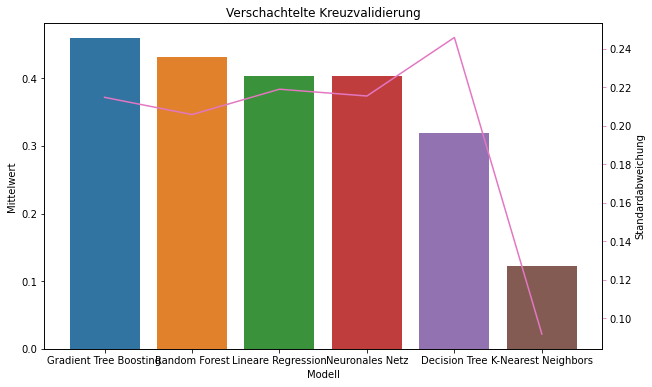

In [86]:
# Darstellung als Säulendiagramm kombiniert mit Liniendiagramm
# Create combo chart
fig, ax1 = plt.subplots(figsize=(10,6))
# Bar plot creation
ax1.set_title('Verschachtelte Kreuzvalidierung')
ax1.set_xlabel('Modell')
ax1.set_ylabel('Mittelwert')
ax1 = sns.barplot(x=df_reg_step_3c.index, y='Mittelwert', data=df_reg_step_3c)
ax1.tick_params(axis='y')
# Specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:pink'
# Line plot creation
ax2.set_ylabel('Standardabweichung')
ax2 = sns.lineplot(x=df_reg_step_3c.index, y='Standardabweichung', data=df_reg_step_3c, sort=False, color=color)
ax2.tick_params(axis='y', color=color)
# Show plot
plt.show()

#### Tabellarisches Ranking des Bestimmtheitsmaßes nach verschachtelter Kreuzvalidierung mit optimierten Hyperparametern - Boxplot

In [87]:
df_plot_nested_kfold_reg = pd.DataFrame(
        {'Decision Tree': scores_tree_reg,
         'Random Forest': scores_forest_reg,
         'Linear Regression': scores_linreg,
         'K-Nearest Neighbors': scores_knn_reg,
         'Neuronales Netz' : scores_neuronales_netz_reg,
         'Gradient Tree Boosting' : scores_gradient_boosting_reg}
)

display(df_plot_nested_kfold_reg.describe())

Decision Tree  Random Forest  Linear Regression  K-Nearest Neighbors  \
count      10.000000      10.000000          10.000000            10.000000   
mean        0.319075       0.432192           0.404008             0.122050   
std         0.259169       0.216903           0.230808             0.096632   
min        -0.090665       0.131516           0.030729             0.000619   
25%         0.114410       0.289039           0.243494             0.055704   
50%         0.356014       0.438963           0.399670             0.111837   
75%         0.479087       0.579220           0.609889             0.184454   
max         0.751776       0.758267           0.705730             0.285418   

       Neuronales Netz  Gradient Tree Boosting  
count        10.000000               10.000000  
mean          0.403353                0.459357  
std           0.227076                0.226360  
min           0.043946                0.134271  
25%           0.239410                0.305204  
50%           0.398204                0.452932  
75%           0.606991                0.625705  
max           0.700024                0.781001

#### Graphisches Ranking des Bestimmtheitsmaßes nach verschachtelter Kreuzvalidierung mit optimierten Hyperparametern - Boxplot

In [88]:
fig = px.box(df_plot_nested_kfold_reg)
fig.update_layout(
    title='Nested Cross Validation',
    xaxis_title='Modelle',
    yaxis_title=' ',
)

In [89]:
toggle = {}

### Interpretation

toggle['Interpretation'] = widgets.ToggleButton(
    value = False,
    description='Interpretation',
    disabled=False,
    button_style='primary', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Interpretation',
    icon='info' # (FontAwesome names without the `fa-` prefix)
)

Interpretation = '''
Durch die verschachtelte Kreuzvalidierung konnte das Ziel eines deutlich gesteigerten Bestimmtheitsmaßes weitestgehend erreicht werden. Sowohl die Mittelwerte als auch die maximalen Werte von $R^2$ haben sich für alle Modelle verbessert und führen somit zu einer höheren Belastbarkeit der Modelle im Allgemeinen. Mit Ausnahme des Decision Tree weisen die Ergebnisse der verschachtelten Kreuzvalidierung keine negativen Werte mehr auf und auch die Ausreißer des Decision Tree sind deutlich weniger extrem als in den anderen Schritten der Modellbildung. Gradient Tree Boosting konnte seine relative Stellung als bestes Modell verteidigen und weist sowohl den höchsten Mittel- als auch Maximalwert von $R^2$ auf. Der Decison Tree und K-nearest Neighbors können mit den anderen Modellen in dieser Hinsicht eher nicht mithalten.
'''    

value[toggle['Interpretation'].model_id] = Markdown(Interpretation)

### Register observer & display

out = widgets.Output(layout=widgets.Layout(border = '1px solid black'))
for t in toggle.values(): 
    output[t.model_id] = out
    t.observe(toggle_button_observer, "value")

display(widgets.HBox([toggle['Interpretation']]))
display(out)

Output(layout=Layout(border='1px solid black'))

### c) Wählen Sie ein optimales Modell auf Basis der Prognosegenauigkeit aus.

In [90]:
# Aufbereitung der Ergebnisse aus der Modellbildung
df_reg_step_1_summary = df_reg_step_1.loc[df_reg_step_1['Data'] == 'Test']
df_reg_step_1_summary = df_reg_step_1_summary.drop(['Data'], axis=1)
df_reg_step_1_summary = df_reg_step_1_summary.sort_values(by='Bestimmtheitsmaß', ascending=False)
df_reg_step_1_summary = df_reg_step_1_summary.rename(columns={"Bestimmtheitsmaß": "$R^2$"})
df_reg_step_1_summary = df_reg_step_1_summary.reset_index()

# Aufbereitung der Ergebnisse aus der K-Fold Cross Validation
df_plot_kfold_reg_summary = df_plot_kfold_reg.describe()
df_plot_kfold_reg_summary = df_plot_kfold_reg_summary.transpose()
df_plot_kfold_reg_summary = df_plot_kfold_reg_summary.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max'], axis=1)
df_plot_kfold_reg_summary = df_plot_kfold_reg_summary.sort_values(by='mean', ascending=False)
df_plot_kfold_reg_summary = df_plot_kfold_reg_summary.rename(columns={'mean': '$R^2$'})
df_plot_kfold_reg_summary = df_plot_kfold_reg_summary.rename_axis('Modell')
df_plot_kfold_reg_summary = df_plot_kfold_reg_summary.reset_index()

# Aufbereitung der Ergebnisse aus der Grid Search
df_reg_step_3b_summary = df_reg_step_3b.drop(['Bestes $R^2$', 'Beste Hyperparameter', 'Bester Estimator'], axis=1)
df_reg_step_3b_summary = df_reg_step_3b_summary.sort_values(by='$R^2$ auf Validierungsdaten mit Hyperparameter Optimierung', ascending=False)
df_reg_step_3b_summary = df_reg_step_3b_summary.rename(columns={'$R^2$ auf Validierungsdaten mit Hyperparameter Optimierung': '$R^2$'})
df_reg_step_3b_summary = df_reg_step_3b_summary.reset_index()

# Aufbereitung der Ergebnisse aus der Verschachtelten Kreuzvalidierung
df_reg_step_3c_summary = df_reg_step_3c.drop(['Standardabweichung'], axis=1)
df_reg_step_3c_summary = df_reg_step_3c_summary.sort_values(by='Mittelwert', ascending=False)
df_reg_step_3c_summary = df_reg_step_3c_summary.rename(columns={'Mittelwert': '$R^2$'})
df_reg_step_3c_summary = df_reg_step_3c_summary.reset_index()

# Darstellung der Ergebnisse in einem Dataframe
header = [np.array(['Modellbildung','Modellbildung','K-Fold Cross Validation','K-Fold Cross Validation','Grid Search','Grid Search', 'Verschachtelte Kreuzvalidierung', 'Verschachtelte Kreuzvalidierung']), 
np.array(['Modell','$R^2$','Modell','$R^2$','Modell','$R^2$','Modell','$R^2$'])] 

regression_result = pd.DataFrame(columns = header)
regression_result['Modellbildung', 'Modell'] = df_reg_step_1_summary['Modell']
regression_result['Modellbildung', '$R^2$'] = df_reg_step_1_summary['$R^2$']
regression_result['K-Fold Cross Validation', 'Modell'] = df_plot_kfold_reg_summary['Modell']
regression_result['K-Fold Cross Validation', '$R^2$'] = df_plot_kfold_reg_summary['$R^2$']
regression_result['Grid Search', 'Modell'] = df_reg_step_3b_summary['Modell']
regression_result['Grid Search', '$R^2$'] = df_reg_step_3b_summary['$R^2$']
regression_result['Verschachtelte Kreuzvalidierung', 'Modell'] = df_reg_step_3c_summary['Modell']
regression_result['Verschachtelte Kreuzvalidierung', '$R^2$'] = df_reg_step_3c_summary['$R^2$']

regression_result = regression_result.style.hide_index()
regression_result

Da es durch (fast) alle Schritte der Modellbildung hinweg und besonders in den letzten Schritten die beste Performance aufweist, wird das **Gradient Tree Boosting-Regressionsmodell** für das weitere Vorgehen genutzt werden.

# Aufgabe 4: Zusammenstellung der Prognose Ergebnisse für Katalonia

### a) Trainieren Sie Ihre ausgewählten Modelle inkl. der optimierten Parameter.

**Gradient Boosting** lieferte im Bezug auf die Prognosegenauigkeit der Klassifikation sowie das Bestimmtheitsmaß der Regression nach Optimierung der Parameter die beste Performance und den höchsten Wert. Daher wird der Gradient Boosting Algorithmus nachfolgend sowohl für die Kaufwahrscheinlichkeitsprognose als auch für die Umsatzschätzung angewendet.

In [91]:
# Zuweisung von X und Y
x_class = df[predictor_attributes]
y_class = df['Kauf']

### Klassifikationsmodell

#### Trainieren eines Gradient Boosting Classifier mit optimierten Hyperparametern

In [92]:
classification_gradient_boosting = GradientBoostingClassifier(max_depth=2, max_features=2, n_estimators=1500,
                                                              random_state=2, subsample=1)

classification_gradient_boosting.fit(x_class, y_class)
print('Prognosegenauigkeit des Gradient Boosting Classifiers auf dem gesamten Trainingsdatensatz: ', classification_gradient_boosting.score(x_class, y_class))

Prognosegenauigkeit des Gradient Boosting Classifiers auf dem gesamten Trainingsdatensatz:  0.9170588235294118


#### Extraktion der Datensätze zu Käufern

In [93]:
df_Käufer = df.loc[df['Kauf'] == 1]

# Zuweisung von X und Y
x_reg = df_Käufer[predictor_attributes]
y_reg = df_Käufer['Umsatz']

### Regressionsmodell

#### Trainieren eines Gradient Boosting Regressor mit optimierten Hyperparametern

In [94]:
regression_gradient_boosting = GradientBoostingRegressor(learning_rate=0.005, max_depth=2, min_samples_split=8,
                                                         n_estimators=1250, random_state=3)

regression_gradient_boosting.fit(x_reg, y_reg)
print('Bestimmtheitsmaß des Gradient Boosting Regressors auf dem gesamten Trainingsdatensatz: ', regression_gradient_boosting.score(x_reg, y_reg))

Bestimmtheitsmaß des Gradient Boosting Regressors auf dem gesamten Trainingsdatensatz:  0.5932421845770609


### b) Ergänzung des Qualifikationsdatensatzes um die Prognosen

**Daten Import**
- Import des Qualifikationsdatensatzes <code>Qualifikationsdaten.csv</code>

In [95]:
### Daten Import
df_quali = pd.read_csv("Qualifikationsdaten.csv", index_col="ID")

**Aufbereitung und Umkodierung des Qualifikationsdatensatzes**
- Umkodierung der binären Ausprägungen der Attribute <b>Land</b>,  <b>Online-Bestellung</b>, <b>Geschlecht</b>,  <b>Adresstyp</b> sowie <b>Kauf</b> in 0 und 1. Des weiteren werden die Attribute <b>Land</b> zu <b>Inland</b>, <b>Geschlecht</b> zu <b>Männlich</b> und <b>Adresstyp</b> zu <b>Firmenadresse</b> umbenannt, wobei der Wert 1 mit <i>True</i> und 0 mit <i>False</i> zu interpretieren ist. Inland = 0 würde so beispielsweise Ausland bedeuten.
- Umkodierung der 15 verschiedenen nachfolgend aufgeführten nominalen Ausprägungen des Attributes <b>Quelle</b> in ganze Zahlen von 0 - 14.

In [96]:
### Binäre Ausprägungen in Zahlen umwandeln

# Land (1 = Inland, 0 = Ausland)
df_quali['Land'].replace(to_replace="Inland", value=1, inplace=True)
df_quali['Land'].replace(to_replace="Ausland", value=0, inplace=True)
df_quali.rename(columns={'Land': 'Inland'}, inplace=True)

# Online-Bestellung (1 = ja, 0 = nein)
df_quali['Online-Bestellung'] = df_quali['Online-Bestellung'].astype(int)

# Geschlecht (0 = weiblich, 1 = männlich)
df_quali['Geschlecht'].replace(to_replace="w", value=0, inplace=True)
df_quali['Geschlecht'].replace(to_replace="m", value=1, inplace=True)
df_quali.rename(columns={'Geschlecht' : 'Männlich'}, inplace=True)

# Adresstyp (0 = Privatadresse, 1 = Firmenadresse)
df_quali['Adresstyp'].replace(to_replace="Privatadresse", value=0, inplace=True)
df_quali['Adresstyp'].replace(to_replace="Firmenadresse", value=1, inplace=True)
df_quali.rename(columns={'Adresstyp' : 'Firmenadresse'}, inplace=True)

In [97]:
### Welche Elemente sind in der Spalte Quelle?
Quelle_unique_sorted = sorted(df_quali['Quelle'].unique())
display(Quelle_unique_sorted)

### Nominale Werte in Zahlen umwandeln 
df_quali['Quelle'].replace(to_replace="A", value=0, inplace=True)
df_quali['Quelle'].replace(to_replace="B", value=1, inplace=True)
df_quali['Quelle'].replace(to_replace="C", value=2, inplace=True)
df_quali['Quelle'].replace(to_replace="D", value=3, inplace=True)
df_quali['Quelle'].replace(to_replace="E", value=4, inplace=True)
df_quali['Quelle'].replace(to_replace="H", value=5, inplace=True)
df_quali['Quelle'].replace(to_replace="M", value=6, inplace=True)
df_quali['Quelle'].replace(to_replace="O", value=7, inplace=True)
df_quali['Quelle'].replace(to_replace="P", value=8, inplace=True)
df_quali['Quelle'].replace(to_replace="R", value=9, inplace=True)
df_quali['Quelle'].replace(to_replace="S", value=10, inplace=True)
df_quali['Quelle'].replace(to_replace="T", value=11, inplace=True)
df_quali['Quelle'].replace(to_replace="U", value=12, inplace=True)
df_quali['Quelle'].replace(to_replace="W", value=13, inplace=True)
df_quali['Quelle'].replace(to_replace="X", value=14, inplace=True)

['A', 'B', 'C', 'D', 'E', 'H', 'M', 'O', 'P', 'R', 'S', 'T', 'U', 'W', 'X']

**Attribut Zuordnung:** Kategorisierung der Attribute des Datensatzes <code>Qualifikationsdaten.csv</code> in binäre, kategorische und numerische Attribute. Definition der predictor_attributes sowie der Zielvariable (Kauf).

In [98]:
### Übersicht der Attribute
binary_attributes_quali = ['Inland', 'Online-Bestellung', 'Männlich', 'Firmenadresse']
categorical_attributes_quali = ['Quelle']
numerical_attributes_quali = ['Transaktionen', 'letzte Aenderung', 'erste Aenderung']
predictor_attributes_quali = binary_attributes_quali + categorical_attributes_quali + numerical_attributes_quali

In [99]:
X = df_quali[predictor_attributes_quali]

In [100]:
df_quali.head(10)

Inland  Quelle  Transaktionen  letzte Aenderung  erste Aenderung  \
ID                                                                       
1944       1       5              2              1710             1746   
243        1       7              1              3517             3747   
1878       1       1              0              3500             3500   
1632       1       0              1              4188             4188   
391        1       3              1              3278             3278   
335        1       2              1              2404             2404   
823        0      13              1               155              155   
297        0      12              3               283              640   
1406       1       5              2              1498             1512   
14         1       0              5              2081             2438   

      Online-Bestellung  Männlich  Firmenadresse  
ID                                                
1944                  0         0              0  
243                   0         0              1  
1878                  1         1              1  
1632                  0         0              1  
391                   1         0              1  
335                   0         1              1  
823                   0         1              1  
297                   0         0              1  
1406                  0         1              0  
14                    0         1              1

### i. Kaufwahrscheinlichkeit

#### Prognose der Kaufwahrscheinlichkeit mit trainiertem Gradient Boosting Classifier

In [101]:
classification_gradient_boosting.predict(X)

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0])

#### Ergänzung der Spalte Kaufwahrscheinlichkeit im Qualifikationsdatensatz

In [102]:
Kaufwahrscheinlichkeit = classification_gradient_boosting.predict_proba(X)

df_quali['Kaufwahrscheinlichkeit'] = Kaufwahrscheinlichkeit[:,1]

df_quali.head(10)

Inland  Quelle  Transaktionen  letzte Aenderung  erste Aenderung  \
ID                                                                       
1944       1       5              2              1710             1746   
243        1       7              1              3517             3747   
1878       1       1              0              3500             3500   
1632       1       0              1              4188             4188   
391        1       3              1              3278             3278   
335        1       2              1              2404             2404   
823        0      13              1               155              155   
297        0      12              3               283              640   
1406       1       5              2              1498             1512   
14         1       0              5              2081             2438   

      Online-Bestellung  Männlich  Firmenadresse  Kaufwahrscheinlichkeit  
ID                                                                        
1944                  0         0              0                0.090338  
243                   0         0              1                0.175931  
1878                  1         1              1                0.000023  
1632                  0         0              1                0.050154  
391                   1         0              1                0.504196  
335                   0         1              1                0.475786  
823                   0         1              1                0.814271  
297                   0         0              1                0.999812  
1406                  0         1              0                0.008500  
14                    0         1              1                0.996813

### ii. Angepasste Kaufwahrscheinlichkeit

Aufgrund der Beschaffenheit des Trainingsdatensatzes (zur Hälfte Käufer und zur anderen Hälfte Nicht-Käufer) und der daraus folgenden scheinbaren Rücklaufquote von 50% muss eine Anpassung der Kaufwahrscheinlichkeit vorgenommen werden, um die reale Rücklaufquote von 5,3% im Modell zu modellieren. Daher wird im Folgenden die zuvor ermittelte Kaufwahrscheinlichkeit mit 10,6% multipliziert und als Spalte 'Angepasste Wahrscheinlichkeit' der Tabelle hinzugefügt.

In [103]:
df_quali['Angepasste Kaufwahrscheinlichkeit'] = df_quali['Kaufwahrscheinlichkeit'] * 0.106

df_quali.head(5)

Inland  Quelle  Transaktionen  letzte Aenderung  erste Aenderung  \
ID                                                                       
1944       1       5              2              1710             1746   
243        1       7              1              3517             3747   
1878       1       1              0              3500             3500   
1632       1       0              1              4188             4188   
391        1       3              1              3278             3278   

      Online-Bestellung  Männlich  Firmenadresse  Kaufwahrscheinlichkeit  \
ID                                                                         
1944                  0         0              0                0.090338   
243                   0         0              1                0.175931   
1878                  1         1              1                0.000023   
1632                  0         0              1                0.050154   
391                   1         0              1                0.504196   

      Angepasste Kaufwahrscheinlichkeit  
ID                                       
1944                           0.009576  
243                            0.018649  
1878                           0.000002  
1632                           0.005316  
391                            0.053445

### iii. Umsatzprognose

#### Prognose der Umsatzgröße mit trainiertem Gradient Boosting Regressor

In [104]:
regression_gradient_boosting.predict(X)

array([ 129.70939847,  124.53640853,  113.39515838,  134.91530722,
        104.62454815,  119.03392125,  202.50655814,  427.37812905,
        151.18832579,  421.92165312,  197.98604174,  302.63298028,
        245.96241289,  129.41281994,  115.96352615,  124.53640853,
        129.70939847,  657.44248359,  161.71081448,  151.18832579,
        130.37289925,  140.19064396,  164.74608915,  147.94032223,
        153.58685379,  119.03392125,  119.03392125,  130.37289925,
        338.61962134,  164.89360304,  119.03392125,  207.14545531,
        190.61831477,  129.41281994,  162.2402402 ,  129.41281994,
        129.41281994,  155.07585832,  154.03292493,  124.91580452,
        113.39515838,  144.70058622,  197.98604174,  143.73688032,
        436.15362487,  130.37289925,  153.58685379,  160.7682527 ,
        186.20288722,  175.29210103,  305.71115545,  130.37289925,
        232.5518439 ,  463.56105102,  171.14715139,  115.96352615,
        128.88734498,  240.24900794,  176.64963867,  115.96352

#### Ergänzung der Spalte Umsatzprognose im Qualifikationsdatensatz

In [105]:
Umsatzprognose = regression_gradient_boosting.predict(X)

df_quali['Umsatzprognose'] = Umsatzprognose.round(2, Umsatzprognose)

df_quali.head(5)

Inland  Quelle  Transaktionen  letzte Aenderung  erste Aenderung  \
ID                                                                       
1944       1       5              2              1710             1746   
243        1       7              1              3517             3747   
1878       1       1              0              3500             3500   
1632       1       0              1              4188             4188   
391        1       3              1              3278             3278   

      Online-Bestellung  Männlich  Firmenadresse  Kaufwahrscheinlichkeit  \
ID                                                                         
1944                  0         0              0                0.090338   
243                   0         0              1                0.175931   
1878                  1         1              1                0.000023   
1632                  0         0              1                0.050154   
391                   1         0              1                0.504196   

      Angepasste Kaufwahrscheinlichkeit  Umsatzprognose  
ID                                                       
1944                           0.009576          129.71  
243                            0.018649          124.54  
1878                           0.000002          113.40  
1632                           0.005316          134.92  
391                            0.053445          104.62

### iv. Umsatzerwartungswert

#### Ergänzung der Spalte Umsatzerwartungswert im Qualifikationsdatensatz

In [106]:
df_quali['Umsatzerwartungswert'] = df_quali['Umsatzprognose'] * df_quali['Angepasste Kaufwahrscheinlichkeit']

df_quali['Umsatzerwartungswert'] = df_quali['Umsatzerwartungswert'].round(2)

df_quali.head(5)

Inland  Quelle  Transaktionen  letzte Aenderung  erste Aenderung  \
ID                                                                       
1944       1       5              2              1710             1746   
243        1       7              1              3517             3747   
1878       1       1              0              3500             3500   
1632       1       0              1              4188             4188   
391        1       3              1              3278             3278   

      Online-Bestellung  Männlich  Firmenadresse  Kaufwahrscheinlichkeit  \
ID                                                                         
1944                  0         0              0                0.090338   
243                   0         0              1                0.175931   
1878                  1         1              1                0.000023   
1632                  0         0              1                0.050154   
391                   1         0              1                0.504196   

      Angepasste Kaufwahrscheinlichkeit  Umsatzprognose  Umsatzerwartungswert  
ID                                                                             
1944                           0.009576          129.71                  1.24  
243                            0.018649          124.54                  2.32  
1878                           0.000002          113.40                  0.00  
1632                           0.005316          134.92                  0.72  
391                            0.053445          104.62                  5.59

### v. Ergebniserwartungswert

Wie aus der Aufgabenstellung entnommen werden kann, fallen pro Mailing Kosten i.H.v. EUR 2 an. Diese Kosten werden nun vom Umsatzerwartungswert abgezogen, um den Ergebniserwartungswert pro Kunde zu erhalten.

#### Ergänzung der Spalte Ergebniserwartungswert im Qualifikationsdatensatz

In [107]:
df_quali['Ergebniserwartungswert'] = df_quali['Umsatzerwartungswert'] - 2

df_quali.head(5)

Inland  Quelle  Transaktionen  letzte Aenderung  erste Aenderung  \
ID                                                                       
1944       1       5              2              1710             1746   
243        1       7              1              3517             3747   
1878       1       1              0              3500             3500   
1632       1       0              1              4188             4188   
391        1       3              1              3278             3278   

      Online-Bestellung  Männlich  Firmenadresse  Kaufwahrscheinlichkeit  \
ID                                                                         
1944                  0         0              0                0.090338   
243                   0         0              1                0.175931   
1878                  1         1              1                0.000023   
1632                  0         0              1                0.050154   
391                   1         0              1                0.504196   

      Angepasste Kaufwahrscheinlichkeit  Umsatzprognose  Umsatzerwartungswert  \
ID                                                                              
1944                           0.009576          129.71                  1.24   
243                            0.018649          124.54                  2.32   
1878                           0.000002          113.40                  0.00   
1632                           0.005316          134.92                  0.72   
391                            0.053445          104.62                  5.59   

      Ergebniserwartungswert  
ID                            
1944                   -0.76  
243                     0.32  
1878                   -2.00  
1632                   -1.28  
391                     3.59

In [108]:
df_quali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1944 to 988
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Inland                             300 non-null    int64  
 1   Quelle                             300 non-null    int64  
 2   Transaktionen                      300 non-null    int64  
 3   letzte Aenderung                   300 non-null    int64  
 4   erste Aenderung                    300 non-null    int64  
 5   Online-Bestellung                  300 non-null    int64  
 6   Männlich                           300 non-null    int64  
 7   Firmenadresse                      300 non-null    int64  
 8   Kaufwahrscheinlichkeit             300 non-null    float64
 9   Angepasste Kaufwahrscheinlichkeit  300 non-null    float64
 10  Umsatzprognose                     300 non-null    float64
 11  Umsatzerwartungswert               300 non-null    floa

### c) Speichern Sie den ergänzten Qualifikationsdatensatz als Excel-Datei „Prognose.xlsx“ ab.

**Daten Export**
- Export des ergänzten Qualifikationsdatensatzes als Excel Datei <code>Prognose.xlsx</code>

<div class="alert alert-block alert-info">
<b>Hinweis:</b><br> 
Der Code zum Export des ergänzten Qualifikationsdatensatzes als Excel Datei ist aktuell mit einem # versehen, um weitere Exporte zu vermeiden, wenn das Notebook erneut ausgeführt wird. </div>

In [109]:
#df_quali.to_excel('Prognose.xlsx')

### d) Stellen Sie den erwarteten Ergebnisbeitrag graphisch als Profitkurve (kumulierter Ergebnisbeitrag als Funktion der Anzahl versendeter Mailings) dar.

Eine verbreitete Darstellung der Leistung von Klassifikationsmodellen ist die Profikurve. In unserem Fall wird der kumulierte Ergebniserwartungswert in Abhängigkeit des Anteils der angesprochenen Kunden graphisch abgebildet.

In [110]:
data_profit_curve = {'Ergebniserwartungswert': df_quali['Ergebniserwartungswert']}
df_profit_curve = pd.DataFrame(data=data_profit_curve)
df_profit_curve = df_profit_curve.sort_values(by=['Ergebniserwartungswert'], ascending=False)
df_profit_curve['Kumulierter Ergebniserwartungswert'] = df_profit_curve.cumsum()
df_profit_curve['Rang'] = np.arange(start=1, stop=len(df_profit_curve)+1, step=1)
df_profit_curve['Anteil der angesprochenen Kunden in %'] = (df_profit_curve['Rang'] / len(df_profit_curve)) * 100
df_profit_curve.head(5)

Ergebniserwartungswert  Kumulierter Ergebniserwartungswert  Rang  \
ID                                                                       
980                   134.96                              134.96     1   
1341                  132.30                              267.26     2   
1099                   67.67                              334.93     3   
1595                   67.63                              402.56     4   
1209                   47.28                              449.84     5   

      Anteil der angesprochenen Kunden in %  
ID                                           
980                                0.333333  
1341                               0.666667  
1099                               1.000000  
1595                               1.333333  
1209                               1.666667

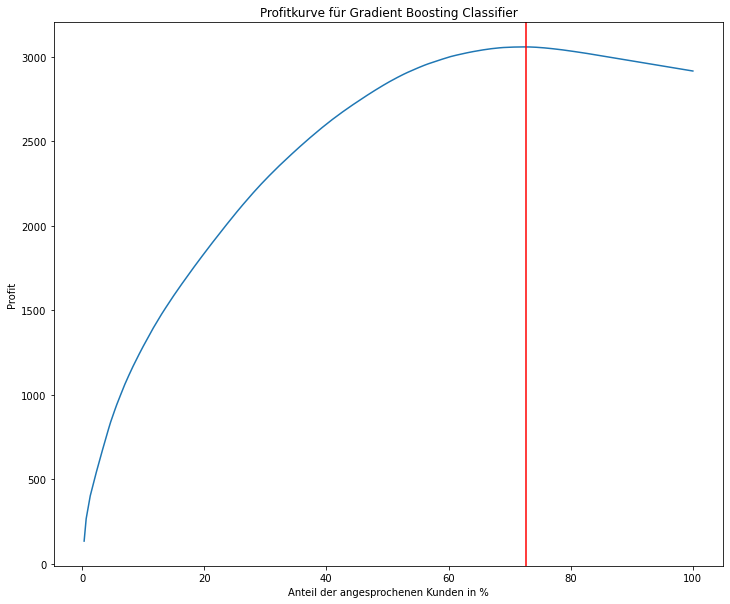

Maximaler kumulierter Ergebniserwartungswert ( 3058.46 €) bei der Ansprache von  72.67 % der Kunden


In [111]:
# Plot line chart
plt.figure(figsize=(12, 10))
plt.plot(df_profit_curve['Anteil der angesprochenen Kunden in %'],
         df_profit_curve['Kumulierter Ergebniserwartungswert'])
# Plot extras
plt.xlabel('Anteil der angesprochenen Kunden in %')
plt.ylabel('Profit')
plt.title('Profitkurve für Gradient Boosting Classifier')
# Plot vertical line for max profit
max_profit = max(df_profit_curve['Kumulierter Ergebniserwartungswert'])
max_profit_row = df_profit_curve.loc[df_profit_curve['Kumulierter Ergebniserwartungswert'] == max_profit]
max_profit_x = df_profit_curve.at[max_profit_row.index.values.astype(int)[0], 'Anteil der angesprochenen Kunden in %']
plt.axvline(x=max_profit_x, c='r')
# Show plot
plt.show()

print('Maximaler kumulierter Ergebniserwartungswert (', max_profit, '€) bei der Ansprache von ', max_profit_x.round(2), '% der Kunden')